In [1]:
import scipy.interpolate as spl
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import scipy.integrate as spint
from scipy.optimize import curve_fit
import csv
from fractions import Fraction
import BayesLineFit_mod as blf

In [71]:
M_times1 = np.arange(0,12.2,0.1)
M_times = np.arange(0,12.1,0.1)
M_bar_comp = np.array([8, 10, 11.5])
t_acc_array = np.array([3, 25, -3])

r_acc_flat_115 = np.loadtxt('data3/r_acc_vs_t_11.5.txt')
r_acc_exp_115 = np.loadtxt('data7/r_acc_vs_t_11.5.txt')
r_acc_flat_10 = np.loadtxt('data3/r_acc_vs_t_10.0.txt')
r_acc_exp_10 = np.loadtxt('data7/r_acc_vs_t_10.0.txt')
r_acc_flat_8 = np.loadtxt('data3/r_acc_vs_t_8.0.txt')
r_acc_exp_8 = np.loadtxt('data7/r_acc_vs_t_8.0.txt')
r_acc_flat = np.array([r_acc_flat_8, r_acc_flat_10, r_acc_flat_115])
r_acc_exp = np.array([r_acc_exp_8, r_acc_exp_10, r_acc_exp_115])

M_gas_old_ksl1 = np.loadtxt('data7/Mass_gas1_vs_t_10.0_old_ksl.txt')
M_gas_old_ksl2 = np.loadtxt('data7/Mass_gas2_vs_t_10.0_old_ksl.txt')
M_gas_old_ksl3 = np.loadtxt('data7/Mass_gas3_vs_t_10.0_old_ksl.txt')

M_gas_new_ksl1 = np.loadtxt('data7/Mass_gas1_vs_t_10.0_new_ksl.txt')
M_gas_new_ksl2 = np.loadtxt('data7/Mass_gas2_vs_t_10.0_new_ksl.txt')
M_gas_new_ksl3 = np.loadtxt('data7/Mass_gas3_vs_t_10.0_new_ksl.txt')

M_gas_boissier1 = np.loadtxt('data7/Mass_gas1_vs_t_10.0_boissier.txt')
M_gas_boissier2 = np.loadtxt('data7/Mass_gas2_vs_t_10.0_boissier.txt')
M_gas_boissier3 = np.loadtxt('data7/Mass_gas3_vs_t_10.0_boissier.txt')

M_gas_old_ksl = np.array([M_gas_old_ksl1, M_gas_old_ksl2, M_gas_old_ksl3])
M_gas_new_ksl = np.array([M_gas_new_ksl1, M_gas_new_ksl2, M_gas_new_ksl3])
M_gas_boissier = np.array([M_gas_boissier1, M_gas_boissier2, M_gas_boissier3])

M_star_old_ksl1 = np.loadtxt('data7/Mass_star1_vs_t_10.0_old_ksl.txt')
M_star_old_ksl2 = np.loadtxt('data7/Mass_star2_vs_t_10.0_old_ksl.txt')
M_star_old_ksl3 = np.loadtxt('data7/Mass_star3_vs_t_10.0_old_ksl.txt')

M_star_new_ksl1 = np.loadtxt('data7/Mass_star1_vs_t_10.0_new_ksl.txt')
M_star_new_ksl2 = np.loadtxt('data7/Mass_star2_vs_t_10.0_new_ksl.txt')
M_star_new_ksl3 = np.loadtxt('data7/Mass_star3_vs_t_10.0_new_ksl.txt')

M_star_boissier1 = np.loadtxt('data7/Mass_star1_vs_t_10.0_boissier.txt')
M_star_boissier2 = np.loadtxt('data7/Mass_star2_vs_t_10.0_boissier.txt')
M_star_boissier3 = np.loadtxt('data7/Mass_star3_vs_t_10.0_boissier.txt')

M_star_old_ksl = np.array([M_star_old_ksl1, M_star_old_ksl2, M_star_old_ksl3])
M_star_new_ksl = np.array([M_star_new_ksl1, M_star_new_ksl2, M_star_new_ksl3])
M_star_boissier = np.array([M_star_boissier1, M_star_boissier2, M_star_boissier3])

M_sfr_old_ksl1 = np.loadtxt('data7/Mass_SFR1_vs_t_10.0_old_ksl.txt')
M_sfr_old_ksl2 = np.loadtxt('data7/Mass_SFR2_vs_t_10.0_old_ksl.txt')
M_sfr_old_ksl3 = np.loadtxt('data7/Mass_SFR3_vs_t_10.0_old_ksl.txt')

M_sfr_new_ksl1 = np.loadtxt('data7/Mass_SFR1_vs_t_10.0_new_ksl.txt')
M_sfr_new_ksl2 = np.loadtxt('data7/Mass_SFR2_vs_t_10.0_new_ksl.txt')
M_sfr_new_ksl3 = np.loadtxt('data7/Mass_SFR3_vs_t_10.0_new_ksl.txt')

M_sfr_boissier1 = np.loadtxt('data7/Mass_SFR1_vs_t_10.0_boissier.txt')
M_sfr_boissier2 = np.loadtxt('data7/Mass_SFR2_vs_t_10.0_boissier.txt')
M_sfr_boissier3 = np.loadtxt('data7/Mass_SFR3_vs_t_10.0_boissier.txt')

M_sfr_old_ksl = np.array([M_sfr_old_ksl1, M_sfr_old_ksl2, M_sfr_old_ksl3])
M_sfr_new_ksl = np.array([M_sfr_new_ksl1, M_sfr_new_ksl2, M_sfr_new_ksl3])
M_sfr_boissier = np.array([M_sfr_boissier1, M_sfr_boissier2, M_sfr_boissier3])

f_gas_old_ksl_8 = np.array([np.loadtxt('data7/f_gas1_vs_t_8.0_old_ksl.txt'), np.loadtxt('data7/f_gas2_vs_t_8.0_old_ksl.txt'), np.loadtxt('data7/f_gas3_vs_t_8.0_old_ksl.txt')])
f_gas_old_ksl_10 = np.array([np.loadtxt('data7/f_gas1_vs_t_10.0_old_ksl.txt'), np.loadtxt('data7/f_gas2_vs_t_10.0_old_ksl.txt'), np.loadtxt('data7/f_gas3_vs_t_10.0_old_ksl.txt')])
f_gas_old_ksl_115 = np.array([np.loadtxt('data7/f_gas1_vs_t_11.5_old_ksl.txt'), np.loadtxt('data7/f_gas2_vs_t_11.5_old_ksl.txt'), np.loadtxt('data7/f_gas3_vs_t_11.5_old_ksl.txt')])

f_gas_new_ksl_8 = np.array([np.loadtxt('data7/f_gas1_vs_t_8.0_new_ksl.txt'), np.loadtxt('data7/f_gas2_vs_t_8.0_new_ksl.txt'), np.loadtxt('data7/f_gas3_vs_t_8.0_new_ksl.txt')])
f_gas_new_ksl_10 = np.array([np.loadtxt('data7/f_gas1_vs_t_10.0_new_ksl.txt'), np.loadtxt('data7/f_gas2_vs_t_10.0_new_ksl.txt'), np.loadtxt('data7/f_gas3_vs_t_10.0_new_ksl.txt')])
f_gas_new_ksl_115 = np.array([np.loadtxt('data7/f_gas1_vs_t_11.5_new_ksl.txt'), np.loadtxt('data7/f_gas2_vs_t_11.5_new_ksl.txt'), np.loadtxt('data7/f_gas3_vs_t_11.5_new_ksl.txt')])

f_gas_boissier_8 = np.array([np.loadtxt('data7/f_gas1_vs_t_8.0_boissier.txt'), np.loadtxt('data7/f_gas2_vs_t_8.0_boissier.txt'), np.loadtxt('data7/f_gas3_vs_t_8.0_boissier.txt')])
f_gas_boissier_10 = np.array([np.loadtxt('data7/f_gas1_vs_t_10.0_boissier.txt'), np.loadtxt('data7/f_gas2_vs_t_10.0_boissier.txt'), np.loadtxt('data7/f_gas3_vs_t_10.0_boissier.txt')])
f_gas_boissier_115 = np.array([np.loadtxt('data7/f_gas1_vs_t_11.5_boissier.txt'), np.loadtxt('data7/f_gas2_vs_t_11.5_boissier.txt'), np.loadtxt('data7/f_gas3_vs_t_11.5_boissier.txt')])

f_gas_old_ksl = np.array([f_gas_old_ksl_8, f_gas_old_ksl_10, f_gas_old_ksl_115])
f_gas_new_ksl = np.array([f_gas_new_ksl_8, f_gas_new_ksl_10, f_gas_new_ksl_115])
f_gas_boissier = np.array([f_gas_boissier_8, f_gas_boissier_10, f_gas_boissier_115])

j_bar_old_ksl_8 = np.array([np.loadtxt('data7/j_bar1_vs_t_8.0_old_ksl.txt'), np.loadtxt('data7/j_bar2_vs_t_8.0_old_ksl.txt'), np.loadtxt('data7/j_bar3_vs_t_8.0_old_ksl.txt')])
j_bar_old_ksl_10 = np.array([np.loadtxt('data7/j_bar1_vs_t_10.0_old_ksl.txt'), np.loadtxt('data7/j_bar2_vs_t_10.0_old_ksl.txt'), np.loadtxt('data7/j_bar3_vs_t_10.0_old_ksl.txt')])
j_bar_old_ksl_115 = np.array([np.loadtxt('data7/j_bar1_vs_t_11.5_old_ksl.txt'), np.loadtxt('data7/j_bar2_vs_t_11.5_old_ksl.txt'), np.loadtxt('data7/j_bar3_vs_t_11.5_old_ksl.txt')])

j_bar_new_ksl_8 = np.array([np.loadtxt('data7/j_bar1_vs_t_8.0_new_ksl.txt'), np.loadtxt('data7/j_bar2_vs_t_8.0_new_ksl.txt'), np.loadtxt('data7/j_bar3_vs_t_8.0_new_ksl.txt')])
j_bar_new_ksl_10 = np.array([np.loadtxt('data7/j_bar1_vs_t_10.0_new_ksl.txt'), np.loadtxt('data7/j_bar2_vs_t_10.0_new_ksl.txt'), np.loadtxt('data7/j_bar3_vs_t_10.0_new_ksl.txt')])
j_bar_new_ksl_115 = np.array([np.loadtxt('data7/j_bar1_vs_t_11.5_new_ksl.txt'), np.loadtxt('data7/j_bar2_vs_t_11.5_new_ksl.txt'), np.loadtxt('data7/j_bar3_vs_t_11.5_new_ksl.txt')])

j_bar_boissier_8 = np.array([np.loadtxt('data7/j_bar1_vs_t_8.0_boissier.txt'), np.loadtxt('data7/j_bar2_vs_t_8.0_boissier.txt'), np.loadtxt('data7/j_bar3_vs_t_8.0_boissier.txt')])
j_bar_boissier_10 = np.array([np.loadtxt('data7/j_bar1_vs_t_10.0_boissier.txt'), np.loadtxt('data7/j_bar2_vs_t_10.0_boissier.txt'), np.loadtxt('data7/j_bar3_vs_t_10.0_boissier.txt')])
j_bar_boissier_115 = np.array([np.loadtxt('data7/j_bar1_vs_t_11.5_boissier.txt'), np.loadtxt('data7/j_bar2_vs_t_11.5_boissier.txt'), np.loadtxt('data7/j_bar3_vs_t_11.5_boissier.txt')])

j_bar_old_ksl = np.array([j_bar_old_ksl_8, j_bar_old_ksl_10, j_bar_old_ksl_115])
j_bar_new_ksl = np.array([j_bar_new_ksl_8, j_bar_new_ksl_10, j_bar_new_ksl_115])
j_bar_boissier = np.array([j_bar_boissier_8, j_bar_boissier_10, j_bar_boissier_115])

j_bar_analytical = np.loadtxt('data7/j_bar_analytical (-3)')

#f_gas_radial_old_ksl_8 = np.array([np.loadtxt('data7/f_gas1_radial_8.0_old_ksl.txt'), np.loadtxt('data7/f_gas2_radial_8.0_old_ksl.txt'), np.loadtxt('data7/f_gas3_radial_8.0_old_ksl.txt')])
f_gas_radial_old_ksl_10 = np.array([np.loadtxt('data7/f_gas1_radial_10.0_old_ksl.txt'), np.loadtxt('data7/f_gas2_radial_10.0_old_ksl.txt'), np.loadtxt('data7/f_gas3_radial_10.0_old_ksl.txt')])
#f_gas_radial_old_ksl_115 = np.array([np.loadtxt('data7/f_gas1_radial_11.5_old_ksl.txt'), np.loadtxt('data7/f_gas2_radial_11.5_old_ksl.txt'), np.loadtxt('data7/f_gas3_radial_11.5_old_ksl.txt')])

#f_gas_radial_new_ksl_8 = np.array([np.loadtxt('data7/f_gas1_radial_8.0_new_ksl.txt'), np.loadtxt('data7/f_gas2_radial_8.0_new_ksl.txt'), np.loadtxt('data7/f_gas3_radial_8.0_new_ksl.txt')])
f_gas_radial_new_ksl_10 = np.array([np.loadtxt('data7/f_gas1_radial_10.0_new_ksl.txt'), np.loadtxt('data7/f_gas2_radial_10.0_new_ksl.txt'), np.loadtxt('data7/f_gas3_radial_10.0_new_ksl.txt')])
#f_gas_radial_new_ksl_115 = np.array([np.loadtxt('data7/f_gas1_radial_11.5_new_ksl.txt'), np.loadtxt('data7/f_gas2_radial_11.5_new_ksl.txt'), np.loadtxt('data7/f_gas3_radial_11.5_new_ksl.txt')])

#f_gas_radial_boissier_8 = np.array([np.loadtxt('data7/f_gas1_radial_8.0_boissier.txt'), np.loadtxt('data7/f_gas2_radial_8.0_boissier.txt'), np.loadtxt('data7/f_gas3_radial_8.0_boissier.txt')])
f_gas_radial_boissier_10 = np.array([np.loadtxt('data7/f_gas1_radial_10.0_boissier.txt'), np.loadtxt('data7/f_gas2_radial_10.0_boissier.txt'), np.loadtxt('data7/f_gas3_radial_10.0_boissier.txt')])
#f_gas_radial_boissier_115 = np.array([np.loadtxt('data7/f_gas1_radial_11.5_boissier.txt'), np.loadtxt('data7/f_gas2_radial_11.5_boissier.txt'), np.loadtxt('data7/f_gas3_radial_11.5_boissier.txt')])

# f_gas_radial_old_ksl = np.array([f_gas_radial_old_ksl_8, f_gas_radial_old_ksl_10, f_gas_radial_old_ksl_115])
# f_gas_radial_new_ksl = np.array([f_gas_radial_new_ksl_8, f_gas_radial_new_ksl_10, f_gas_radial_new_ksl_115])
# f_gas_radial_boissier = np.array([f_gas_radial_boissier_8, f_gas_radial_boissier_10, f_gas_radial_boissier_115])

Sigma_gas_old_ksl_8 = np.array([np.loadtxt('data7/Sigma_gas_old_ksl1_8.0.txt'), np.loadtxt('data7/Sigma_gas_old_ksl2_8.0.txt'), np.loadtxt('data7/Sigma_gas_old_ksl3_8.0.txt')])
Sigma_gas_old_ksl_10 = np.array([np.loadtxt('data7/Sigma_gas_old_ksl1_10.0.txt'), np.loadtxt('data7/Sigma_gas_old_ksl2_10.0.txt'), np.loadtxt('data7/Sigma_gas_old_ksl3_10.0.txt')])
Sigma_gas_old_ksl_115 = np.array([np.loadtxt('data7/Sigma_gas_old_ksl1_11.5.txt'), np.loadtxt('data7/Sigma_gas_old_ksl2_11.5.txt'), np.loadtxt('data7/Sigma_gas_old_ksl3_11.5.txt')])

Sigma_gas_new_ksl_8 = np.array([np.loadtxt('data7/Sigma_gas_new_ksl1_8.0.txt'), np.loadtxt('data7/Sigma_gas_new_ksl2_8.0.txt'), np.loadtxt('data7/Sigma_gas_new_ksl3_8.0.txt')])
Sigma_gas_new_ksl_10 = np.array([np.loadtxt('data7/Sigma_gas_new_ksl1_10.0.txt'), np.loadtxt('data7/Sigma_gas_new_ksl2_10.0.txt'), np.loadtxt('data7/Sigma_gas_new_ksl3_10.0.txt')])
Sigma_gas_new_ksl_115 = np.array([np.loadtxt('data7/Sigma_gas_new_ksl1_11.5.txt'), np.loadtxt('data7/Sigma_gas_new_ksl2_11.5.txt'), np.loadtxt('data7/Sigma_gas_new_ksl3_11.5.txt')])

Sigma_gas_boissier_8 = np.array([np.loadtxt('data7/Sigma_gas_boissier1_8.0.txt'), np.loadtxt('data7/Sigma_gas_boissier2_8.0.txt'), np.loadtxt('data7/Sigma_gas_boissier3_8.0.txt')])
Sigma_gas_boissier_10 = np.array([np.loadtxt('data7/Sigma_gas_boissier1_10.0.txt'), np.loadtxt('data7/Sigma_gas_boissier2_10.0.txt'), np.loadtxt('data7/Sigma_gas_boissier3_10.0.txt')])
Sigma_gas_boissier_115 = np.array([np.loadtxt('data7/Sigma_gas_boissier1_11.5.txt'), np.loadtxt('data7/Sigma_gas_boissier2_11.5.txt'), np.loadtxt('data7/Sigma_gas_boissier3_11.5.txt')])

Sigma_star_old_ksl_8 = np.array([np.loadtxt('data7/M_star1_8.0_old_ksl.txt'), np.loadtxt('data7/M_star2_8.0_old_ksl.txt'), np.loadtxt('data7/M_star3_8.0_old_ksl.txt')])
Sigma_star_old_ksl_10 = np.array([np.loadtxt('data7/M_star1_10.0_old_ksl.txt'), np.loadtxt('data7/M_star2_10.0_old_ksl.txt'), np.loadtxt('data7/M_star3_10.0_old_ksl.txt')])
Sigma_star_old_ksl_115 = np.array([np.loadtxt('data7/M_star1_11.5_old_ksl.txt'), np.loadtxt('data7/M_star2_11.5_old_ksl.txt'), np.loadtxt('data7/M_star3_11.5_old_ksl.txt')])

Sigma_star_new_ksl_8 = np.array([np.loadtxt('data7/M_star1_8.0_new_ksl.txt'), np.loadtxt('data7/M_star2_8.0_new_ksl.txt'), np.loadtxt('data7/M_star3_8.0_new_ksl.txt')])
Sigma_star_new_ksl_10 = np.array([np.loadtxt('data7/M_star1_10.0_new_ksl.txt'), np.loadtxt('data7/M_star2_10.0_new_ksl.txt'), np.loadtxt('data7/M_star3_10.0_new_ksl.txt')])
Sigma_star_new_ksl_115 = np.array([np.loadtxt('data7/M_star1_11.5_new_ksl.txt'), np.loadtxt('data7/M_star2_11.5_new_ksl.txt'), np.loadtxt('data7/M_star3_11.5_new_ksl.txt')])

Sigma_star_boissier_8 = np.array([np.loadtxt('data7/M_star1_8.0_boissier.txt'), np.loadtxt('data7/M_star2_8.0_boissier.txt'), np.loadtxt('data7/M_star3_8.0_boissier.txt')])
Sigma_star_boissier_10 = np.array([np.loadtxt('data7/M_star1_10.0_boissier.txt'), np.loadtxt('data7/M_star2_10.0_boissier.txt'), np.loadtxt('data7/M_star3_10.0_boissier.txt')])
Sigma_star_boissier_115 = np.array([np.loadtxt('data7/M_star1_11.5_boissier.txt'), np.loadtxt('data7/M_star2_11.5_boissier.txt'), np.loadtxt('data7/M_star3_11.5_boissier.txt')])

#Sigma_gas_old_ksl = np.array([Sigma_gas_old_ksl_8, Sigma_gas_old_ksl_10, Sigma_gas_old_ksl_115])
#Sigma_gas_new_ksl = np.array([Sigma_gas_new_ksl_8, Sigma_gas_new_ksl_10, Sigma_gas_new_ksl_115])
#Sigma_gas_boissier = np.array([Sigma_gas_boissier_8, Sigma_gas_boissier_10, Sigma_gas_boissier_115])

In [70]:
NGC4183_HI = pd.read_table("allHIprofs/NGC4183_fullHI.dat", sep=" ", usecols=["r[kpc]", "vrot[km/s]", "Sigma_HI[Msun/pc2]", "jHI[kpckm/s]"])
NGC4183_star = pd.read_table("allSTARSprofs/NGC4183_fullstars.dat", sep=" ", usecols=["r[kpc]", "vrot[km/s]", "Sigma_star[Msun/pc2]", "jstar[kpckm/s]"])

NGC4183_HI['r[kpc]'] =  pd.to_numeric(NGC4183_HI['r[kpc]'], errors='coerce')
NGC4183_HI['vrot[km/s]'] =  pd.to_numeric(NGC4183_HI['vrot[km/s]'], errors='coerce')
NGC4183_HI['Sigma_HI[Msun/pc2]'] =  pd.to_numeric(NGC4183_HI['Sigma_HI[Msun/pc2]'], errors='coerce')
NGC4183_HI['jHI[kpckm/s]'] =  pd.to_numeric(NGC4183_HI['jHI[kpckm/s]'], errors='coerce')

NGC4183_star['r[kpc]'] =  pd.to_numeric(NGC4183_star['r[kpc]'], errors='coerce')
NGC4183_star['vrot[km/s]'] =  pd.to_numeric(NGC4183_star['vrot[km/s]'], errors='coerce')
NGC4183_star['Sigma_star[Msun/pc2]'] =  pd.to_numeric(NGC4183_star['Sigma_star[Msun/pc2]'], errors='coerce')
NGC4183_star['jstar[kpckm/s]'] =  pd.to_numeric(NGC4183_star['jstar[kpckm/s]'], errors='coerce')

NGC4183_r_obs_HI = NGC4183_HI['r[kpc]']
NGC4183_r_obs_star = NGC4183_star['r[kpc]']
NGC4183_v_obs = NGC4183_HI['vrot[km/s]']
NGC4183_Sigma_gas_obs = NGC4183_HI['Sigma_HI[Msun/pc2]']
NGC4183_Sigma_star_obs = NGC4183_star['Sigma_star[Msun/pc2]']

NGC0925_HI = pd.read_table("allHIprofs/NGC0925_fullHI.dat", sep=" ", usecols=["r[kpc]", "vrot[km/s]", "Sigma_HI[Msun/pc2]", "jHI[kpckm/s]"])
NGC0925_star = pd.read_table("allSTARSprofs/NGC0925_fullstars.dat", sep=" ", usecols=["r[kpc]", "vrot[km/s]", "Sigma_star[Msun/pc2]", "jstar[kpckm/s]"])

NGC0925_HI['r[kpc]'] =  pd.to_numeric(NGC0925_HI['r[kpc]'], errors='coerce')
NGC0925_HI['vrot[km/s]'] =  pd.to_numeric(NGC0925_HI['vrot[km/s]'], errors='coerce')
NGC0925_HI['Sigma_HI[Msun/pc2]'] =  pd.to_numeric(NGC0925_HI['Sigma_HI[Msun/pc2]'], errors='coerce')
NGC0925_HI['jHI[kpckm/s]'] =  pd.to_numeric(NGC0925_HI['jHI[kpckm/s]'], errors='coerce')

NGC0925_star['r[kpc]'] =  pd.to_numeric(NGC0925_star['r[kpc]'], errors='coerce')
NGC0925_star['vrot[km/s]'] =  pd.to_numeric(NGC0925_star['vrot[km/s]'], errors='coerce')
NGC0925_star['Sigma_star[Msun/pc2]'] =  pd.to_numeric(NGC0925_star['Sigma_star[Msun/pc2]'], errors='coerce')
NGC0925_star['jstar[kpckm/s]'] =  pd.to_numeric(NGC0925_star['jstar[kpckm/s]'], errors='coerce')

NGC0925_r_obs_HI = NGC0925_HI['r[kpc]']
NGC0925_r_obs_star = NGC0925_star['r[kpc]']
NGC0925_v_obs = NGC0925_HI['vrot[km/s]']
NGC0925_Sigma_gas_obs = NGC0925_HI['Sigma_HI[Msun/pc2]']
NGC0925_Sigma_star_obs = NGC0925_star['Sigma_star[Msun/pc2]']

NGC3198_HI = pd.read_table("allHIprofs/NGC3198_fullHI.dat", sep=" ", usecols=["r[kpc]", "vrot[km/s]", "Sigma_HI[Msun/pc2]", "jHI[kpckm/s]"])
NGC3198_star = pd.read_table("allSTARSprofs/NGC3198_fullstars.dat", sep=" ", usecols=["r[kpc]", "vrot[km/s]", "Sigma_star[Msun/pc2]", "jstar[kpckm/s]"])

NGC3198_HI['r[kpc]'] =  pd.to_numeric(NGC3198_HI['r[kpc]'], errors='coerce')
NGC3198_HI['vrot[km/s]'] =  pd.to_numeric(NGC3198_HI['vrot[km/s]'], errors='coerce')
NGC3198_HI['Sigma_HI[Msun/pc2]'] =  pd.to_numeric(NGC3198_HI['Sigma_HI[Msun/pc2]'], errors='coerce')
NGC3198_HI['jHI[kpckm/s]'] =  pd.to_numeric(NGC3198_HI['jHI[kpckm/s]'], errors='coerce')

NGC3198_star['r[kpc]'] =  pd.to_numeric(NGC3198_star['r[kpc]'], errors='coerce')
NGC3198_star['vrot[km/s]'] =  pd.to_numeric(NGC3198_star['vrot[km/s]'], errors='coerce')
NGC3198_star['Sigma_star[Msun/pc2]'] =  pd.to_numeric(NGC3198_star['Sigma_star[Msun/pc2]'], errors='coerce')
NGC3198_star['jstar[kpckm/s]'] =  pd.to_numeric(NGC3198_star['jstar[kpckm/s]'], errors='coerce')

NGC3198_r_obs_HI = NGC3198_HI['r[kpc]']
NGC3198_r_obs_star = NGC3198_star['r[kpc]']
NGC3198_v_obs = NGC3198_HI['vrot[km/s]']
NGC3198_Sigma_gas_obs = NGC3198_HI['Sigma_HI[Msun/pc2]']
NGC3198_Sigma_star_obs = NGC3198_star['Sigma_star[Msun/pc2]']

In [4]:
def find_nearest(array, value):
    """
    Finds nearest element in an array with wanted value
    
    Inputs:
    array(np.array): array to extract closest element to wanted value
    value(int): wanted value to find closest element to
    
    Returns:
    array[idx](np.array): indexed array with index of closest value
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

r = np.arange(0,1000*100.1,120)
index_r1 = np.argwhere(r == find_nearest(r, 25000.))[0][0]
index_r2 = np.argwhere(r == find_nearest(r, 50000.))[0][0]
index_r3 = np.argwhere(r == find_nearest(r, 75000.))[0][0]
index_r4 = np.argwhere(r == find_nearest(r, 100000.))[0][0]
index_t1 = np.argwhere(M_times1 == 3.)[0][0]
index_t2 = np.argwhere(M_times1 == 6.)[0][0]
index_t3 = np.argwhere(M_times1 == 9.)[0][0]
index_t4 = np.argwhere(M_times1 == 12.)[0][0]

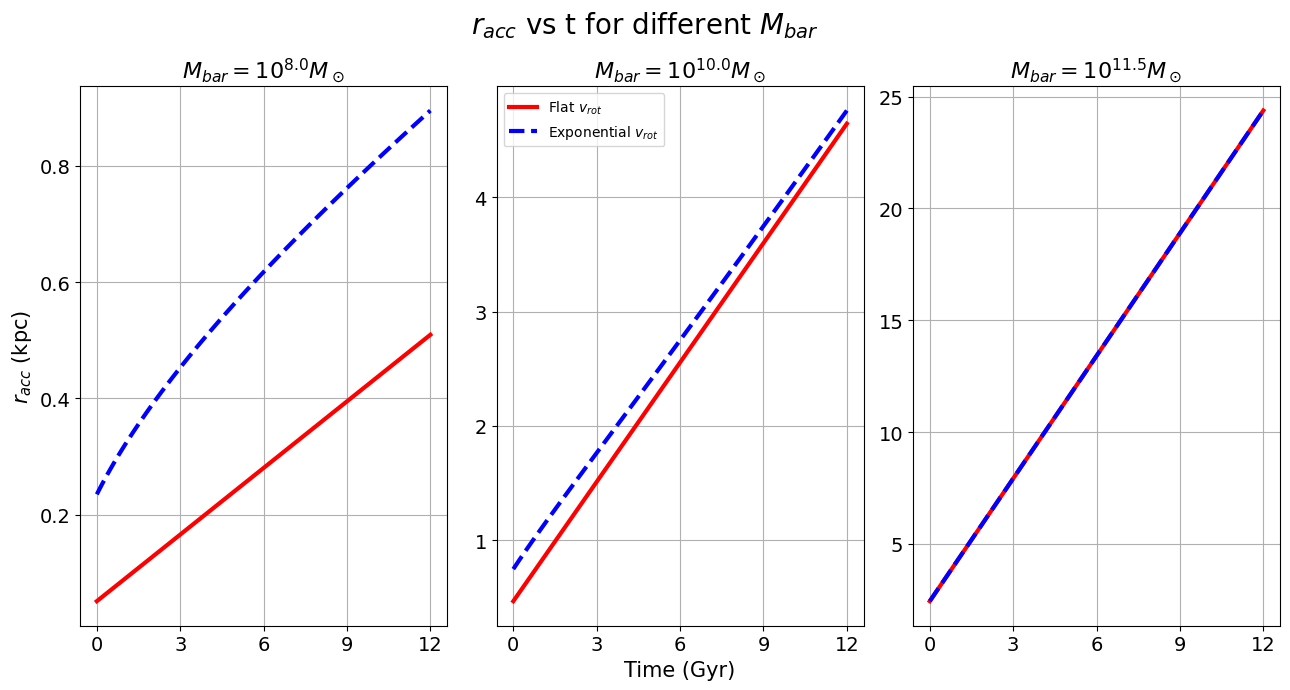

In [47]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey="col", figsize=(13, 7), facecolor='w')

# Set the labels and titles of the subplots
f1 = axes[0]
f2 = axes[1]
f3 = axes[2]
fig.suptitle(r"$r_{acc}$ vs t for different $M_{bar}$", fontsize = 20)
f2.set_xlabel("Time (Gyr)", fontsize = 15)
f1.set_ylabel(r"$r_{acc}$ (kpc)", fontsize = 15)

for i, M1, M2, mbar in zip(range(3), r_acc_flat, r_acc_exp, M_bar_comp):
    axes[i].plot(M_times, M1, label=r"Flat $v_{rot}$", color="red", lw=3)
    axes[i].plot(M_times, M2, label=r"Exponential $v_{rot}$", color="blue", ls="--", lw=3)
    axes[i].set_title(fr"$M_{{bar}}=10^{{{mbar:.1f}}} M_\odot$", fontsize=16)
    
f2.legend()
# Add grid lines to each subplot and adjust layout
for ax in axes:
    ax.grid(True)
    ax.tick_params(labelsize=14)
    ax.set_xticks([0, 3, 6, 9, 12])

plt.tight_layout()
show()

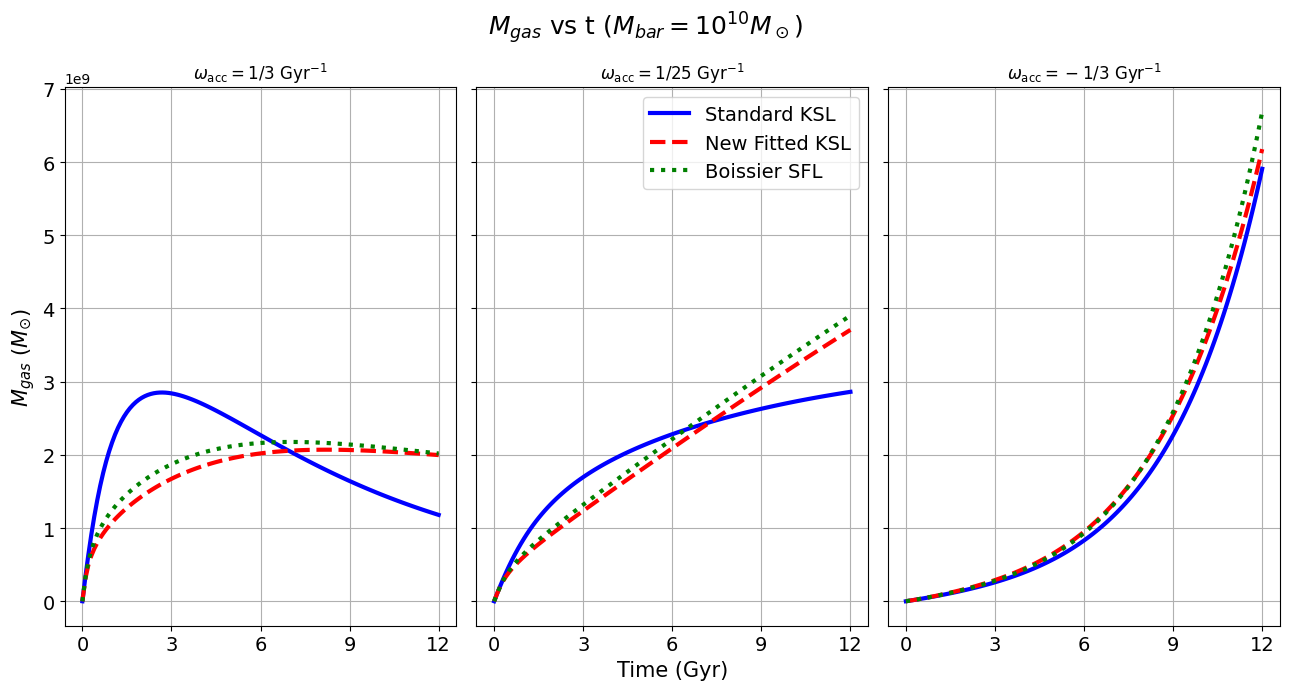

In [6]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(13, 7), facecolor='w')

# Set the labels and titles of the subplots
f1 = axes[0]
f2 = axes[1]
f3 = axes[2]
fig.suptitle(fr"$M_{{gas}}$ vs t ($M_{{bar}}=10^{{10}}M_\odot$)", fontsize = 18)
f2.set_xlabel("Time (Gyr)", fontsize = 15)
f1.set_ylabel(r"$M_{gas}$ $(M_{\odot})$", fontsize = 15)

for i, M1, M2, M3, tacc in zip(range(3), M_gas_old_ksl, M_gas_new_ksl, M_gas_boissier, t_acc_array):
    axes[i].plot(M_times, M1[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[i].plot(M_times, M2[:-1], label=r"New Fitted KSL", color="red", ls="--", lw=3)
    axes[i].plot(M_times, M3[:-1], label=r"Boissier SFL", color="green", ls="dotted", lw=3)
    axes[i].set_title(fr"$\omega_{{\mathrm{{acc}}}} = {Fraction(1,int(tacc))}$ Gyr$^{{-1}}$")
    
f2.legend(prop={'size': 14})
# Add grid lines to each subplot and adjust layout
for ax in axes:
    ax.grid(True)
    ax.tick_params(labelsize=14)
    ax.set_xticks([0, 3, 6, 9, 12])

plt.tight_layout()
show()

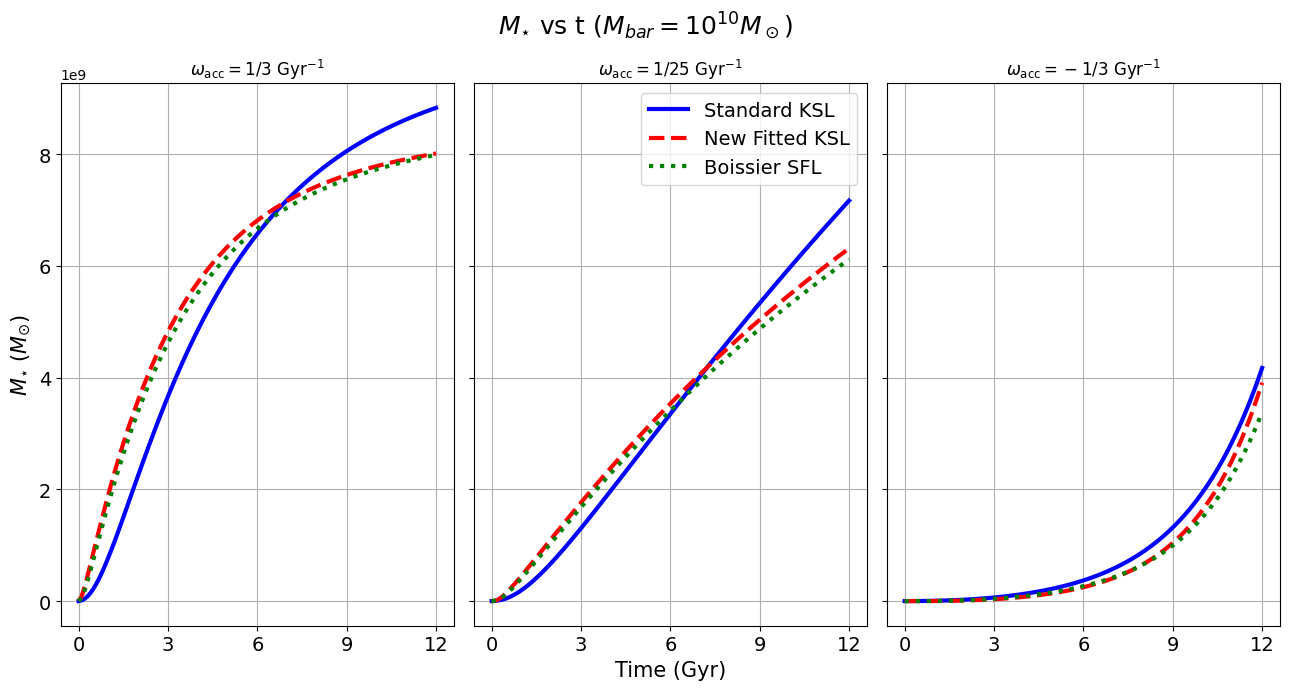

In [7]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(13, 7), facecolor='w')

# Set the labels and titles of the subplots
f1 = axes[0]
f2 = axes[1]
f3 = axes[2]
fig.suptitle(fr"$M_{{\star}}$ vs t ($M_{{bar}}=10^{{10}}M_\odot$)", fontsize = 18)
f2.set_xlabel("Time (Gyr)", fontsize = 15)
f1.set_ylabel(r"$M_{\star}$ $(M_{\odot})$", fontsize = 15)

for i, M1, M2, M3, tacc in zip(range(3), M_star_old_ksl, M_star_new_ksl, M_star_boissier, t_acc_array):
    axes[i].plot(M_times, M1[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[i].plot(M_times, M2[:-1], label=r"New Fitted KSL", color="red", ls="--", lw=3)
    axes[i].plot(M_times, M3[:-1], label=r"Boissier SFL", color="green", ls="dotted", lw=3)
    axes[i].set_title(fr"$\omega_{{\mathrm{{acc}}}} = {Fraction(1,int(tacc))}$ Gyr$^{{-1}}$")
    
f2.legend(prop={'size': 14})
# Add grid lines to each subplot and adjust layout
for ax in axes:
    ax.grid(True)
    ax.tick_params(labelsize=14)
    ax.set_xticks([0, 3, 6, 9, 12])

plt.tight_layout()
show()

In [8]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(13, 7), facecolor='w')

# Set the labels and titles of the subplots
f1 = axes[0]
f2 = axes[1]
f3 = axes[2]
fig.suptitle(fr"$M_{{SFR}}$ vs t ($M_{{bar}}=10^{{10}}M_\odot$)", fontsize = 18)
f2.set_xlabel("Time (Gyr)", fontsize = 15)
f1.set_ylabel(r"$M_{SFR}$ $(M_{\odot}$ Gyr$^{-1})$", fontsize = 15)

for i, M1, M2, M3, tacc in zip(range(3), M_sfr_old_ksl, M_sfr_new_ksl, M_sfr_boissier, t_acc_array):
    axes[i].plot(M_times, M1[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[i].plot(M_times, M2[:-1], label=r"New Fitted KSL", color="red", ls="--", lw=3)
    axes[i].plot(M_times, M3[:-1], label=r"Boissier SFL", color="green", ls="dotted", lw=3)
    axes[i].set_title(fr"$\omega_{{\mathrm{{acc}}}} = {Fraction(1,int(tacc))}$ Gyr$^{{-1}}$")
    
f2.legend(prop={'size': 14})
# Add grid lines to each subplot and adjust layout
for ax in axes:
    ax.grid(True)
    ax.tick_params(labelsize=14)
    ax.set_xticks([0, 3, 6, 9, 12])

plt.tight_layout()
show()

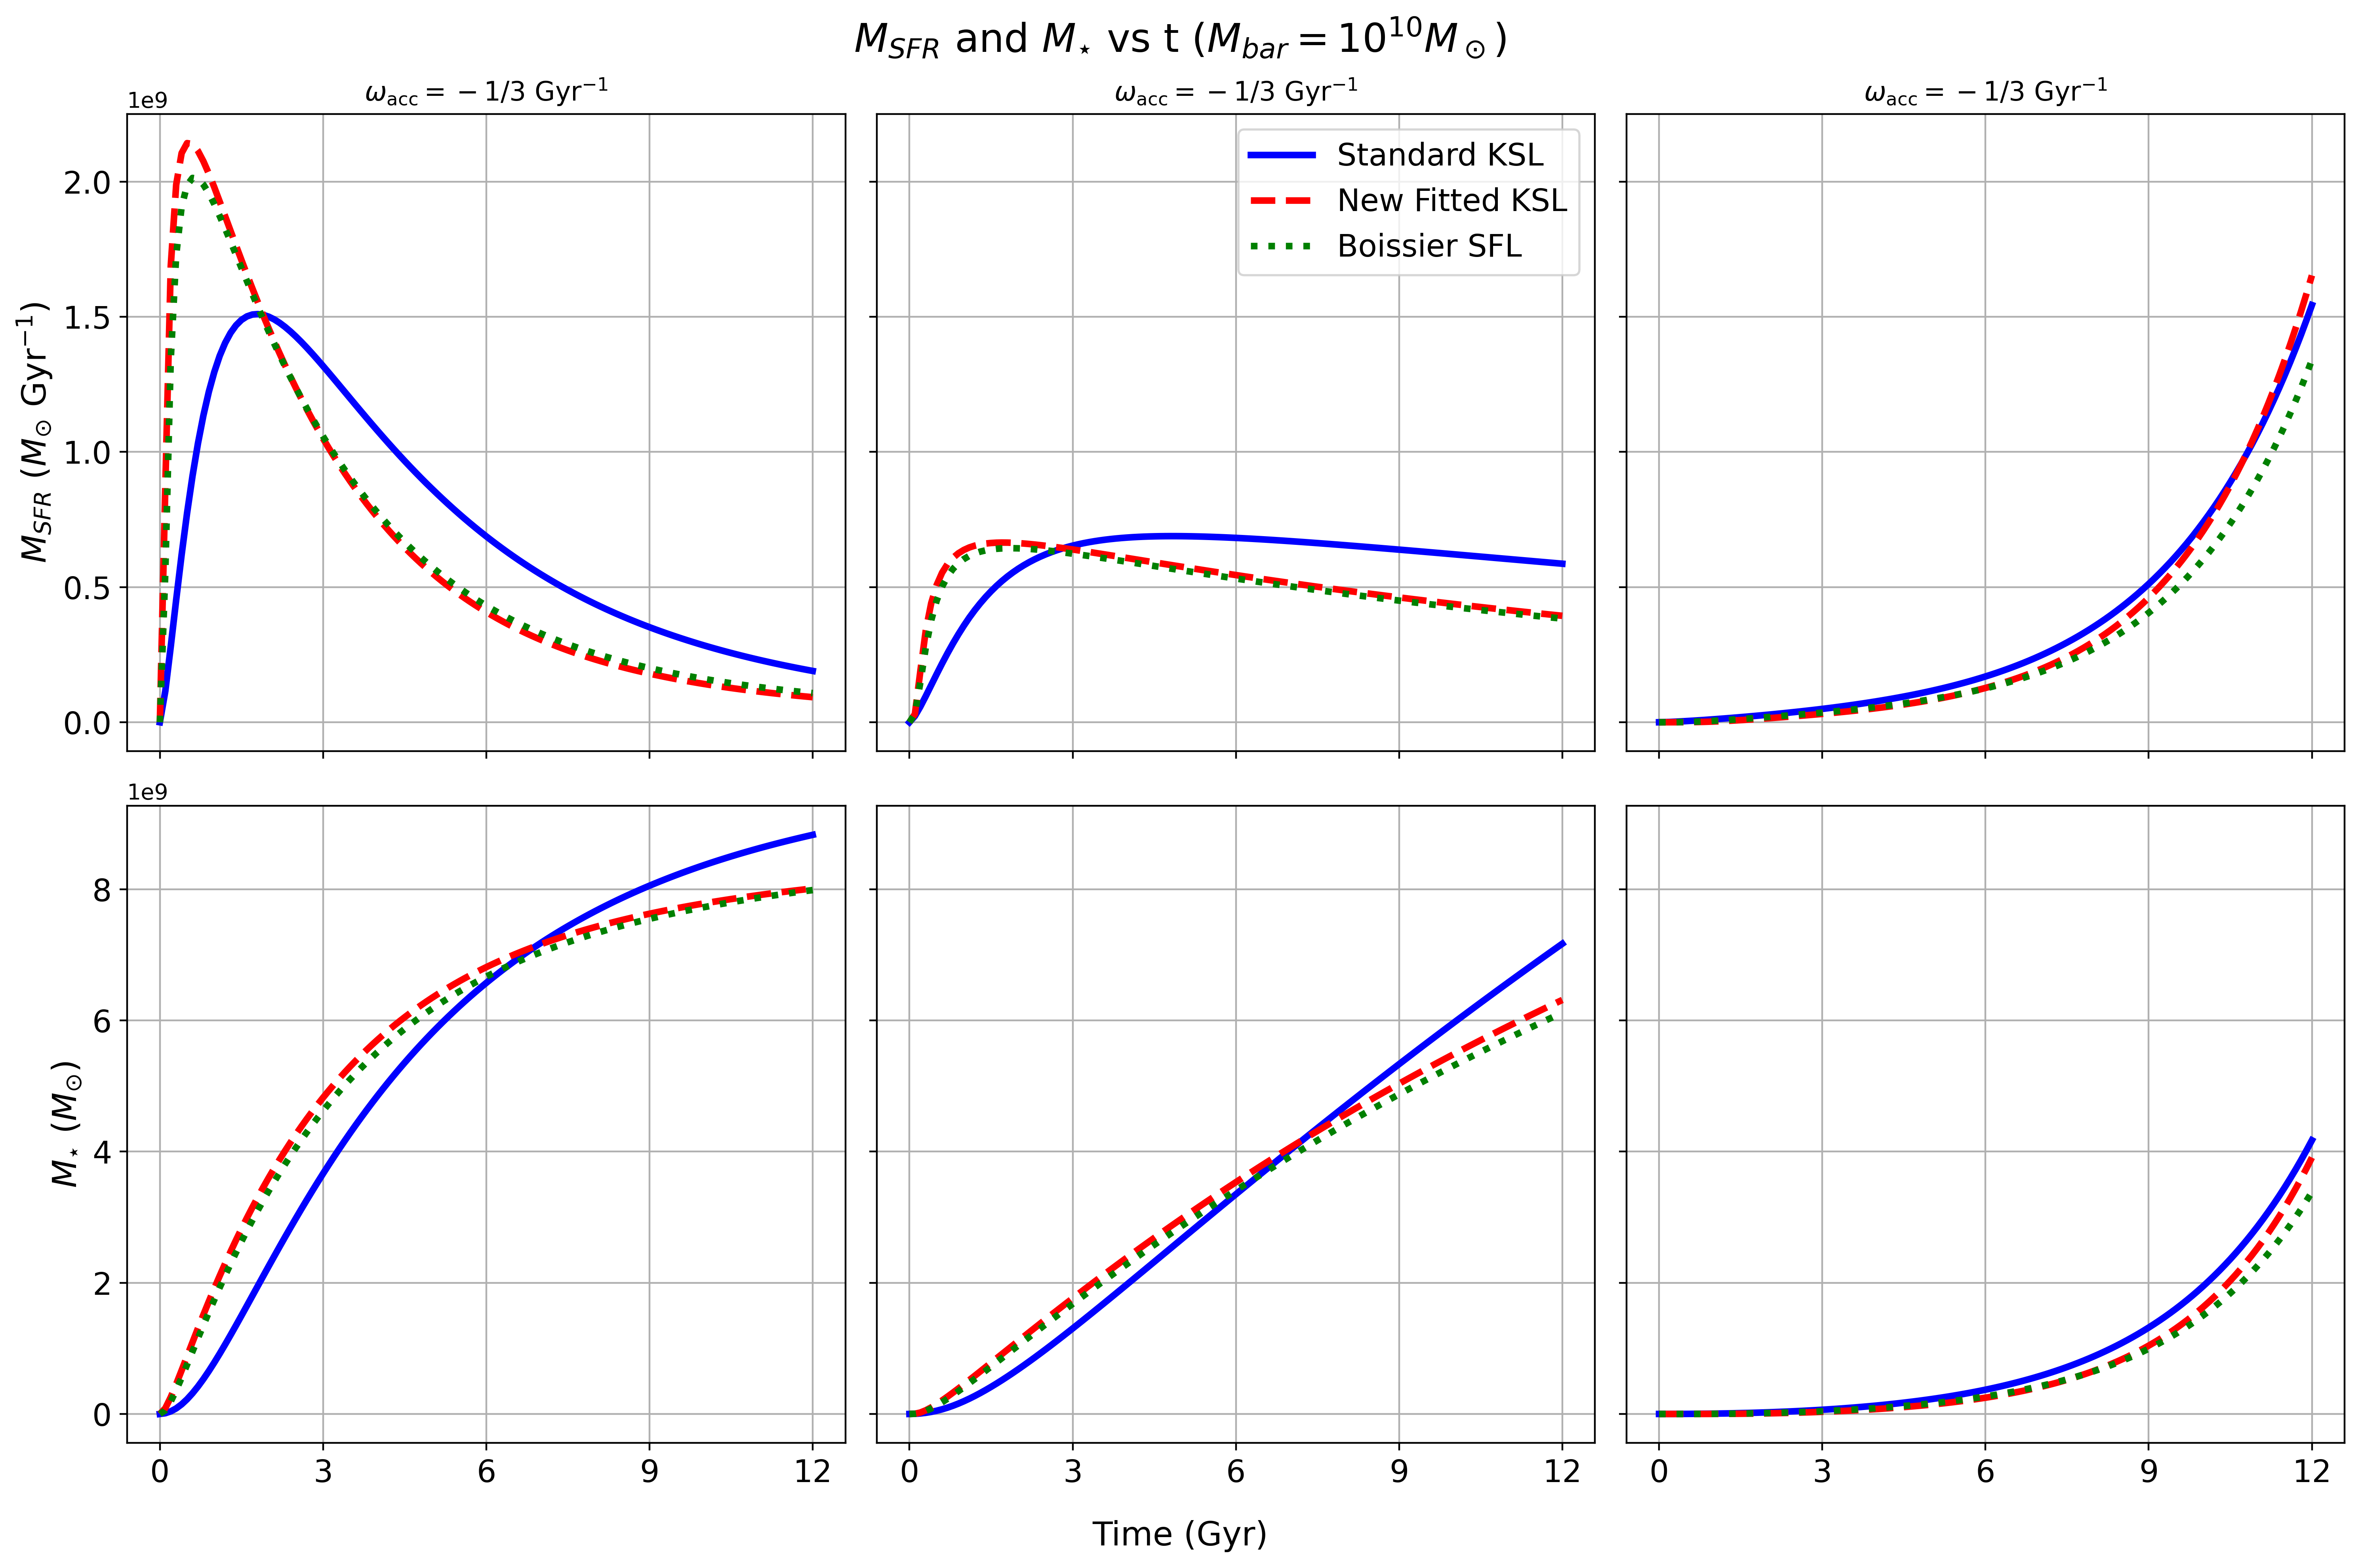

In [9]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey='row', figsize=(15, 10), dpi=400)

# Set the labels and titles of the subplots
fig.suptitle(fr"SFR and $M_{{\star}}$ vs t ($M_{{bar}}=10^{{10}}M_\odot$)", fontsize = 18)
fig.supxlabel("Time (Gyr)", fontsize = 15)
    
for i, M1, M2, M3, M4, M5, M6, mbar in zip(range(3), M_sfr_old_ksl, M_sfr_new_ksl, M_sfr_boissier, M_star_old_ksl, M_star_new_ksl, M_star_boissier, t_acc_array):
    axes[0,i].plot(M_times, M1[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[0,i].plot(M_times, M2[:-1], label=r"New Fitted KSL", linestyle="dashed", color="red", lw=3)
    axes[0,i].plot(M_times, M3[:-1], label=r"Boissier SFL", linestyle="dotted", color="green", lw=3)
    axes[0,i].set_title(fr"$\omega_{{\mathrm{{acc}}}} = {Fraction(1,int(tacc))}$ Gyr$^{{-1}}$")
    
    axes[1,i].plot(M_times, M4[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[1,i].plot(M_times, M5[:-1], label=r"New Fitted KSL", linestyle="dashed", color="red", lw=3)
    axes[1,i].plot(M_times, M6[:-1], label=r"Boissier SFL", linestyle="dotted", color="green", lw=3)

axes[0,1].legend(prop={'size': 14})
axes[0,0].set_ylabel(r"SFR $(M_{\odot}$ Gyr$^{-1})$", fontsize = 15)
axes[1,0].set_ylabel(r"$M_{\star}$ $(M_{\odot})$", fontsize = 15)
# Add grid lines to each subplot and adjust layout
for axe in axes:
    for ax in axe:
        ax.grid(True)
        ax.tick_params(labelsize=14)
        ax.set_xticks([0, 3, 6, 9, 12])

plt.tight_layout()
show()

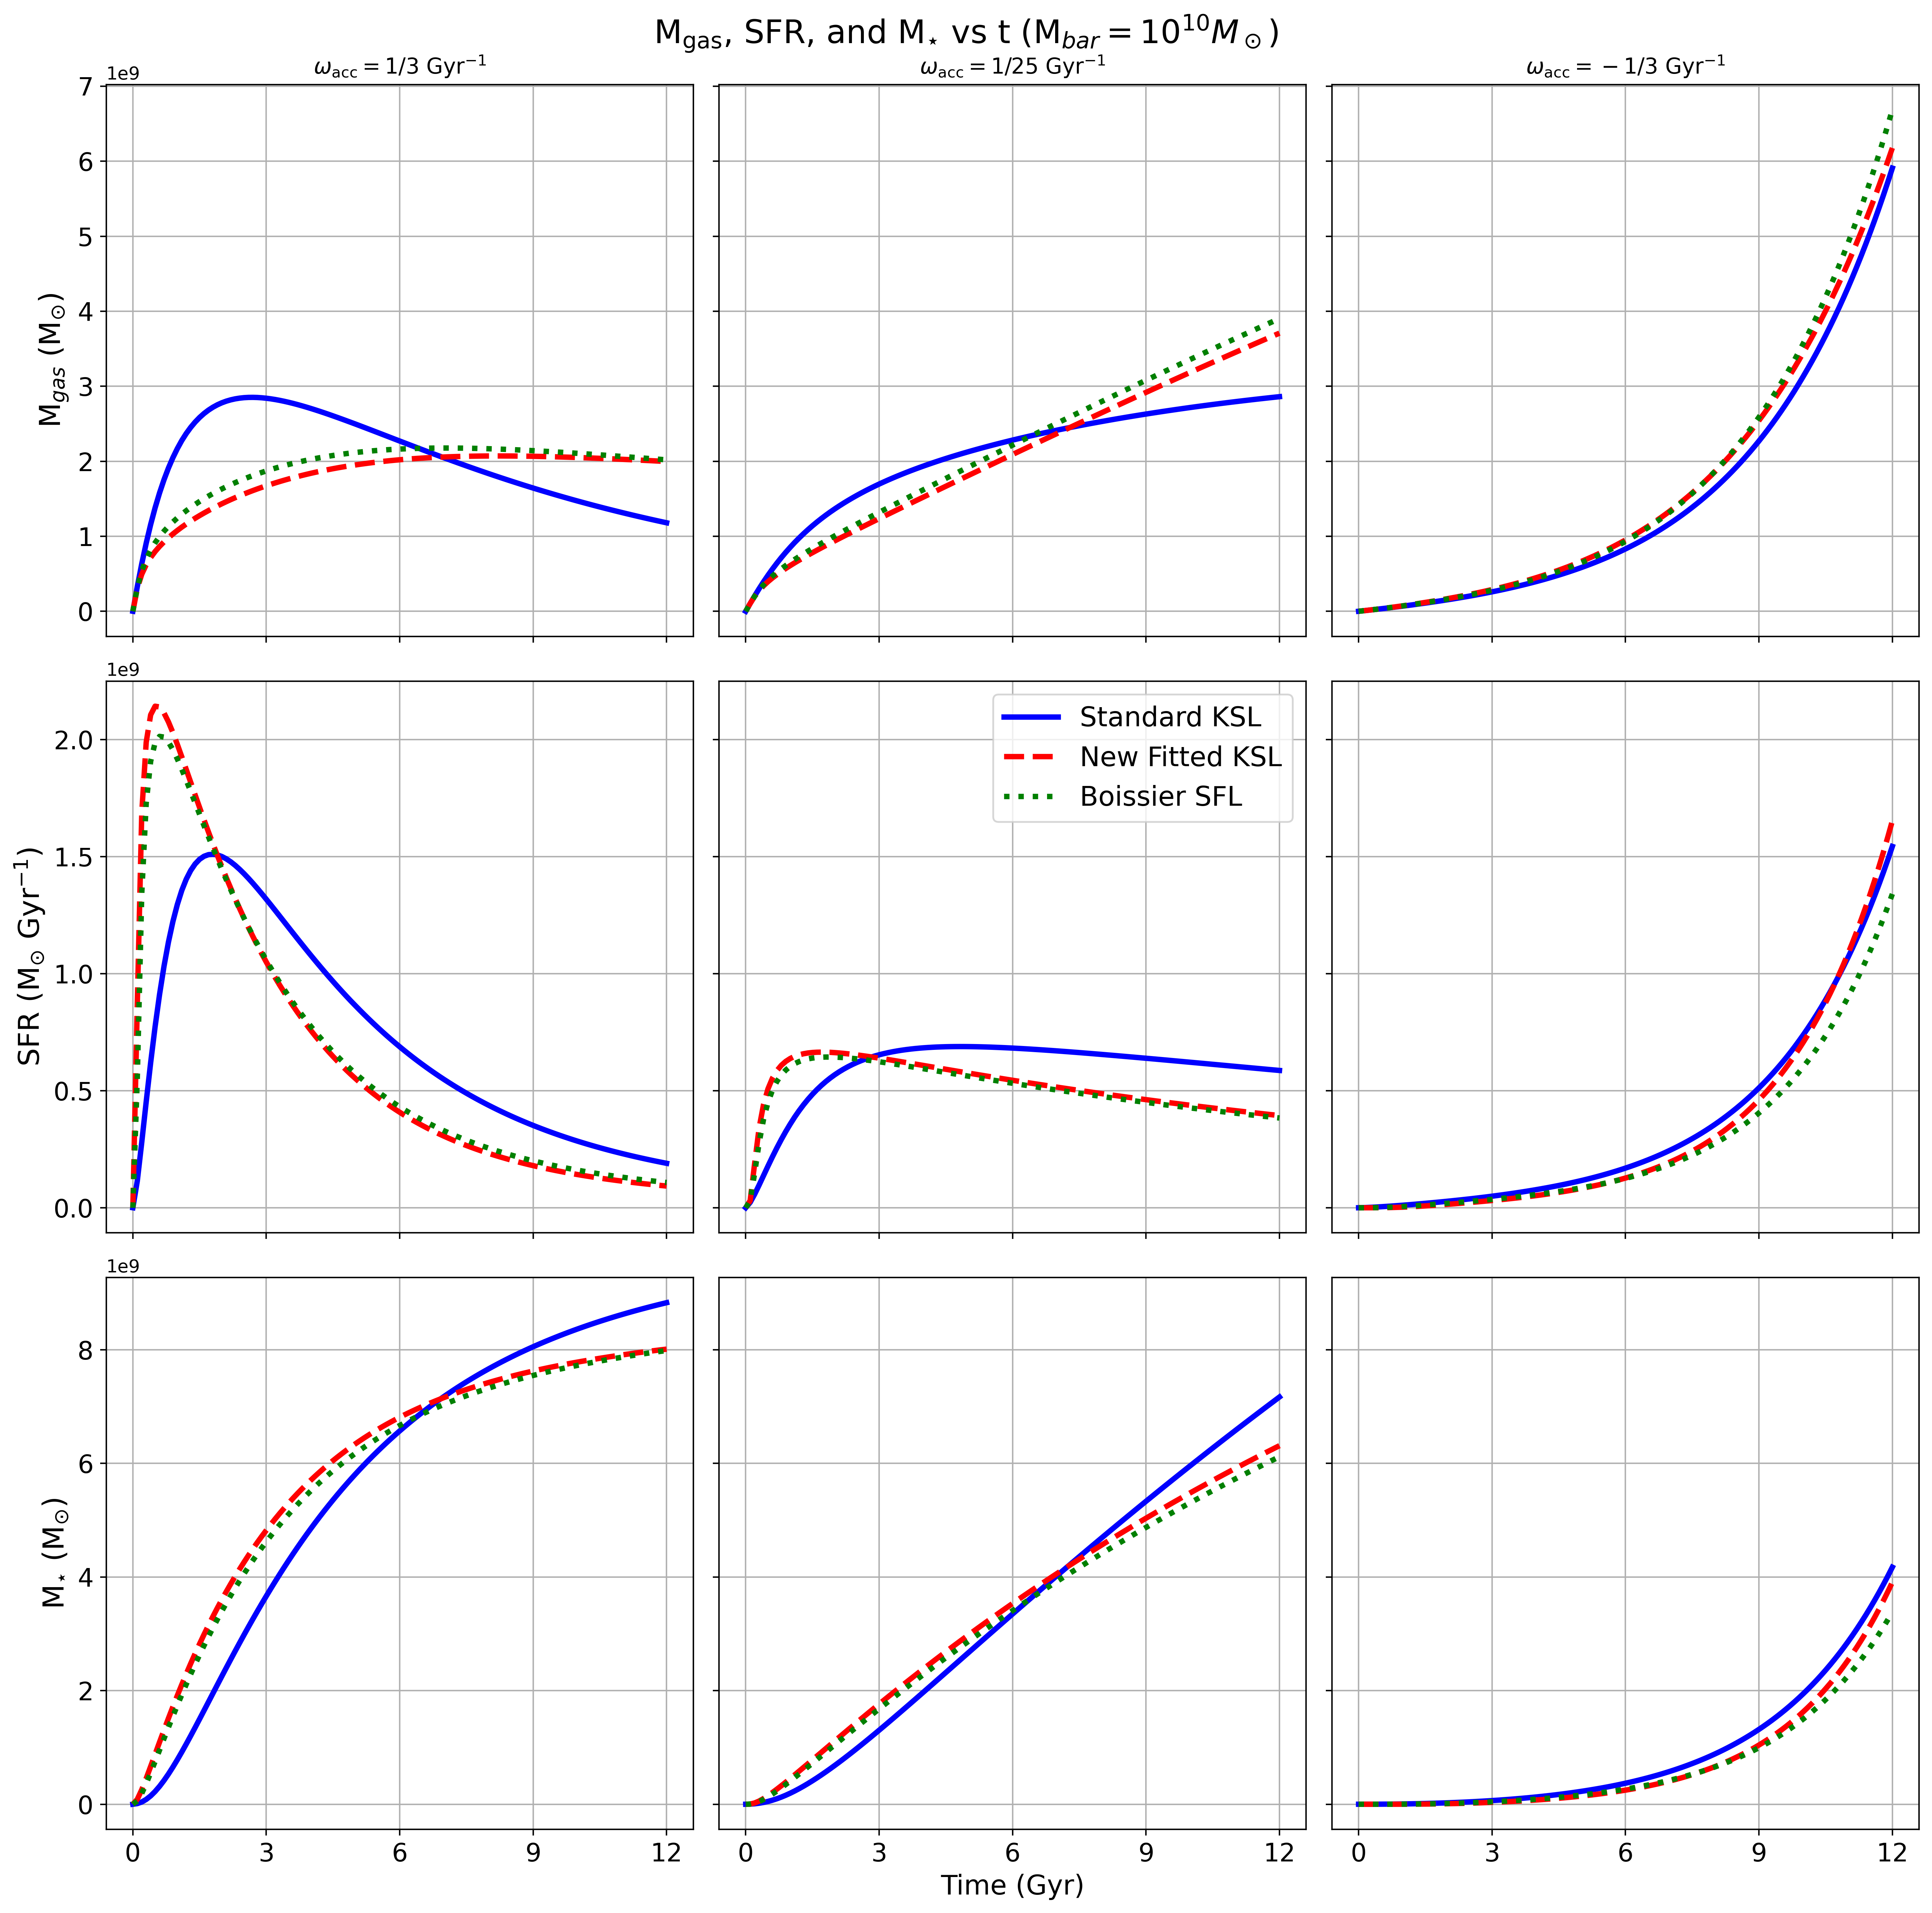

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey='row', figsize=(15, 15), dpi=400, facecolor='w')

fig.suptitle(fr"$\mathrm{{M}}_{{\mathrm{{gas}}}}$, SFR, and $\mathrm{{M}}_{{\star}}$ vs t ($\mathrm{{M}}_{{bar}}=10^{{10}}M_\odot$)", fontsize=18)

axes[0, 0].set_ylabel(r"$\mathrm{{M}}_{gas}$ $(\mathrm{{M}}_{\odot})$", fontsize=16)
for i, (M1, M2, M3, tacc) in enumerate(zip(M_gas_old_ksl, M_gas_new_ksl, M_gas_boissier, t_acc_array)):
    axes[0, i].plot(M_times, M1[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[0, i].plot(M_times, M2[:-1], label=r"New Fitted KSL", color="red", ls="--", lw=3)
    axes[0, i].plot(M_times, M3[:-1], label=r"Boissier SFL", color="green", ls="dotted", lw=3)
    axes[0, i].set_title(fr"$\omega_{{\mathrm{{acc}}}} = {Fraction(1, int(tacc))}$ Gyr$^{{-1}}$")

axes[1, 0].set_ylabel(r"SFR $(\mathrm{{M}}_{\odot}$ Gyr$^{-1})$", fontsize=16)
for i, (M1, M2, M3, tacc) in enumerate(zip(M_sfr_old_ksl, M_sfr_new_ksl, M_sfr_boissier, t_acc_array)):
    axes[1, i].plot(M_times, M1[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[1, i].plot(M_times, M2[:-1], label=r"New Fitted KSL", linestyle="dashed", color="red", lw=3)
    axes[1, i].plot(M_times, M3[:-1], label=r"Boissier SFL", linestyle="dotted", color="green", lw=3)

axes[2, 0].set_ylabel(r"$\mathrm{{M}}_{\star}$ $(\mathrm{{M}}_{\odot})$", fontsize=16)
axes[2, 1].set_xlabel("Time (Gyr)", fontsize=15)
for i, (M1, M2, M3, tacc) in enumerate(zip(M_star_old_ksl, M_star_new_ksl, M_star_boissier, t_acc_array)):
    axes[2, i].plot(M_times, M1[:-1], label=r"Standard KSL", color="blue", lw=3)
    axes[2, i].plot(M_times, M2[:-1], label=r"New Fitted KSL", linestyle="dashed", color="red", lw=3)
    axes[2, i].plot(M_times, M3[:-1], label=r"Boissier SFL", linestyle="dotted", color="green", lw=3)

axes[1, 1].legend(prop={'size': 15})

for axe in axes:
    for ax in axe:
        ax.grid(True)
        ax.tick_params(labelsize=14)
        ax.set_xticks([0, 3, 6, 9, 12])

plt.tight_layout()
show()

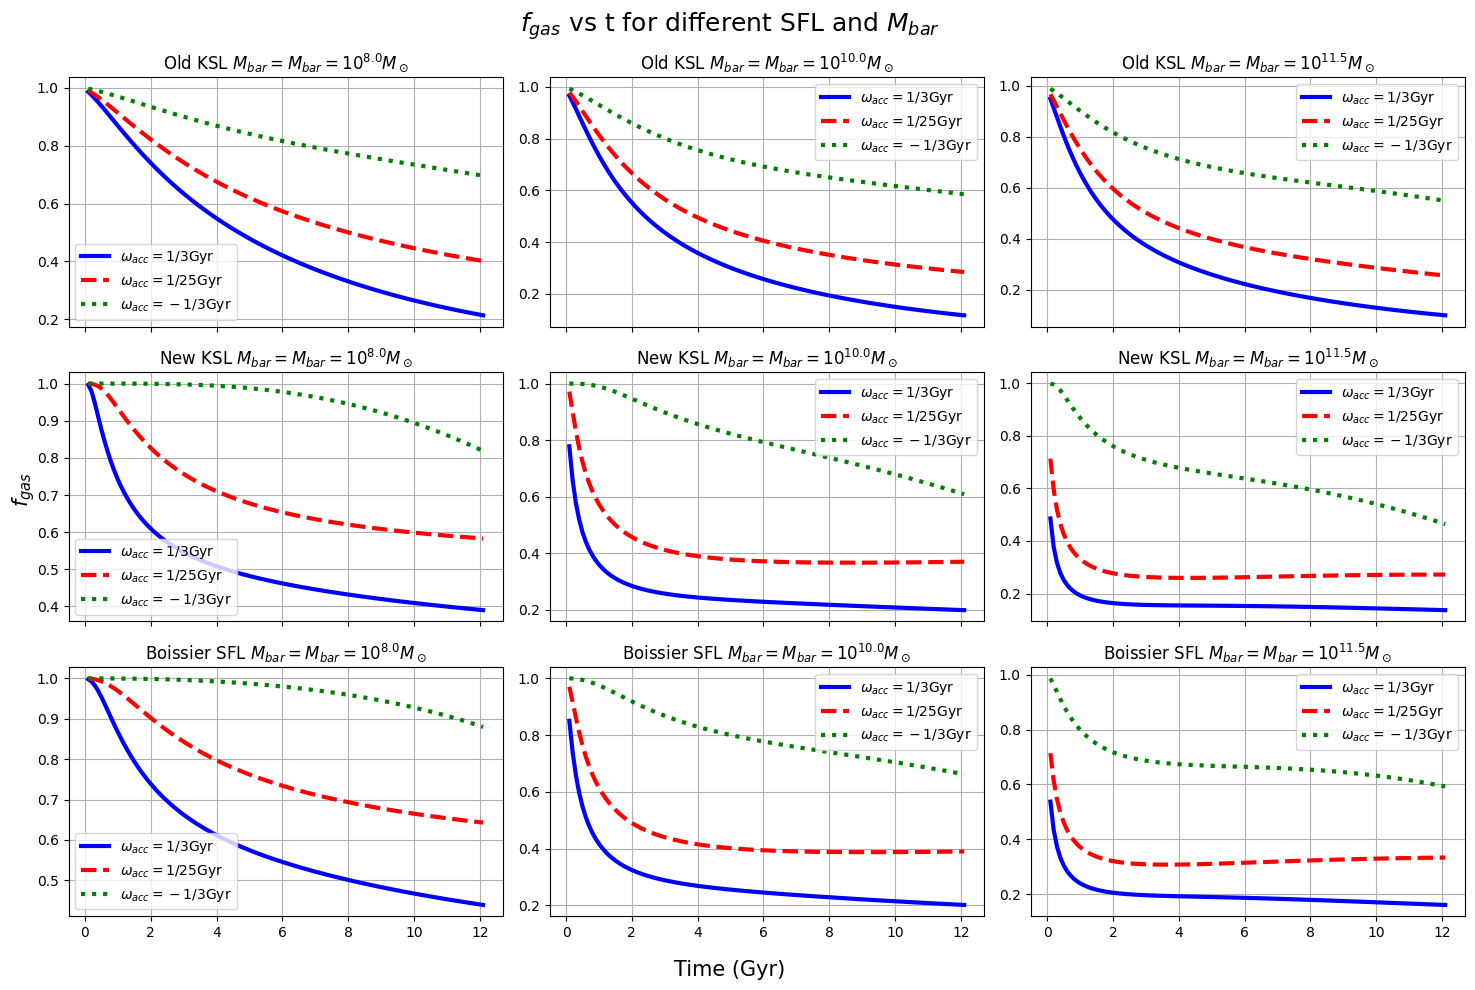

In [10]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(15, 10))

# Set the labels and titles of the subplots
fig.suptitle(r"$f_{gas}$ vs t for different SFL and $M_{bar}$", fontsize = 18)
fig.supxlabel("Time (Gyr)", fontsize = 15)
fig.supylabel(r"$f_{gas}$", fontsize = 15)
    
for i, M1, M2, M3, mbar in zip(range(3), f_gas_old_ksl, f_gas_new_ksl, f_gas_boissier, M_bar_comp):
    axes[0,i].plot(M_times1, M1[0], label=r"$\omega_{acc} = 1/3$Gyr", color="blue", lw=3)
    axes[0,i].plot(M_times1, M1[1], label=r"$\omega_{acc} = 1/25$Gyr", linestyle="dashed", color="red", lw=3)
    axes[0,i].plot(M_times1, M1[2], label=r"$\omega_{acc} = -1/3$Gyr", linestyle="dotted", color="green", lw=3)
    axes[0,i].set_title(fr"Old KSL $M_{{bar}}=M_{{bar}}=10^{{{mbar:.1f}}} M_\odot$")
    
    axes[1,i].plot(M_times1, M2[0], label=r"$\omega_{acc} = 1/3$Gyr", color="blue", lw=3)
    axes[1,i].plot(M_times1, M2[1], label=r"$\omega_{acc} = 1/25$Gyr", linestyle="dashed", color="red", lw=3)
    axes[1,i].plot(M_times1, M2[2], label=r"$\omega_{acc} = -1/3$Gyr", linestyle="dotted", color="green", lw=3)
    axes[1,i].set_title(fr"New KSL $M_{{bar}}=M_{{bar}}=10^{{{mbar:.1f}}} M_\odot$")
    
    axes[2,i].plot(M_times1, M3[0], label=r"$\omega_{acc} = 1/3$Gyr", color="blue", lw=3)
    axes[2,i].plot(M_times1, M3[1], label=r"$\omega_{acc} = 1/25$Gyr", linestyle="dashed", color="red", lw=3)
    axes[2,i].plot(M_times1, M3[2], label=r"$\omega_{acc} = -1/3$Gyr", linestyle="dotted", color="green", lw=3)
    axes[2,i].set_title(fr"Boissier SFL $M_{{bar}}=M_{{bar}}=10^{{{mbar:.1f}}} M_\odot$")
    
    axes[0,i].legend()
    axes[1,i].legend()
    axes[2,i].legend()
    
# Add grid lines to each subplot and adjust layout
for axe in axes:
    for ax in axe:
        ax.grid(True)
        ax.tick_params(labelsize=14)

plt.tight_layout()
show()

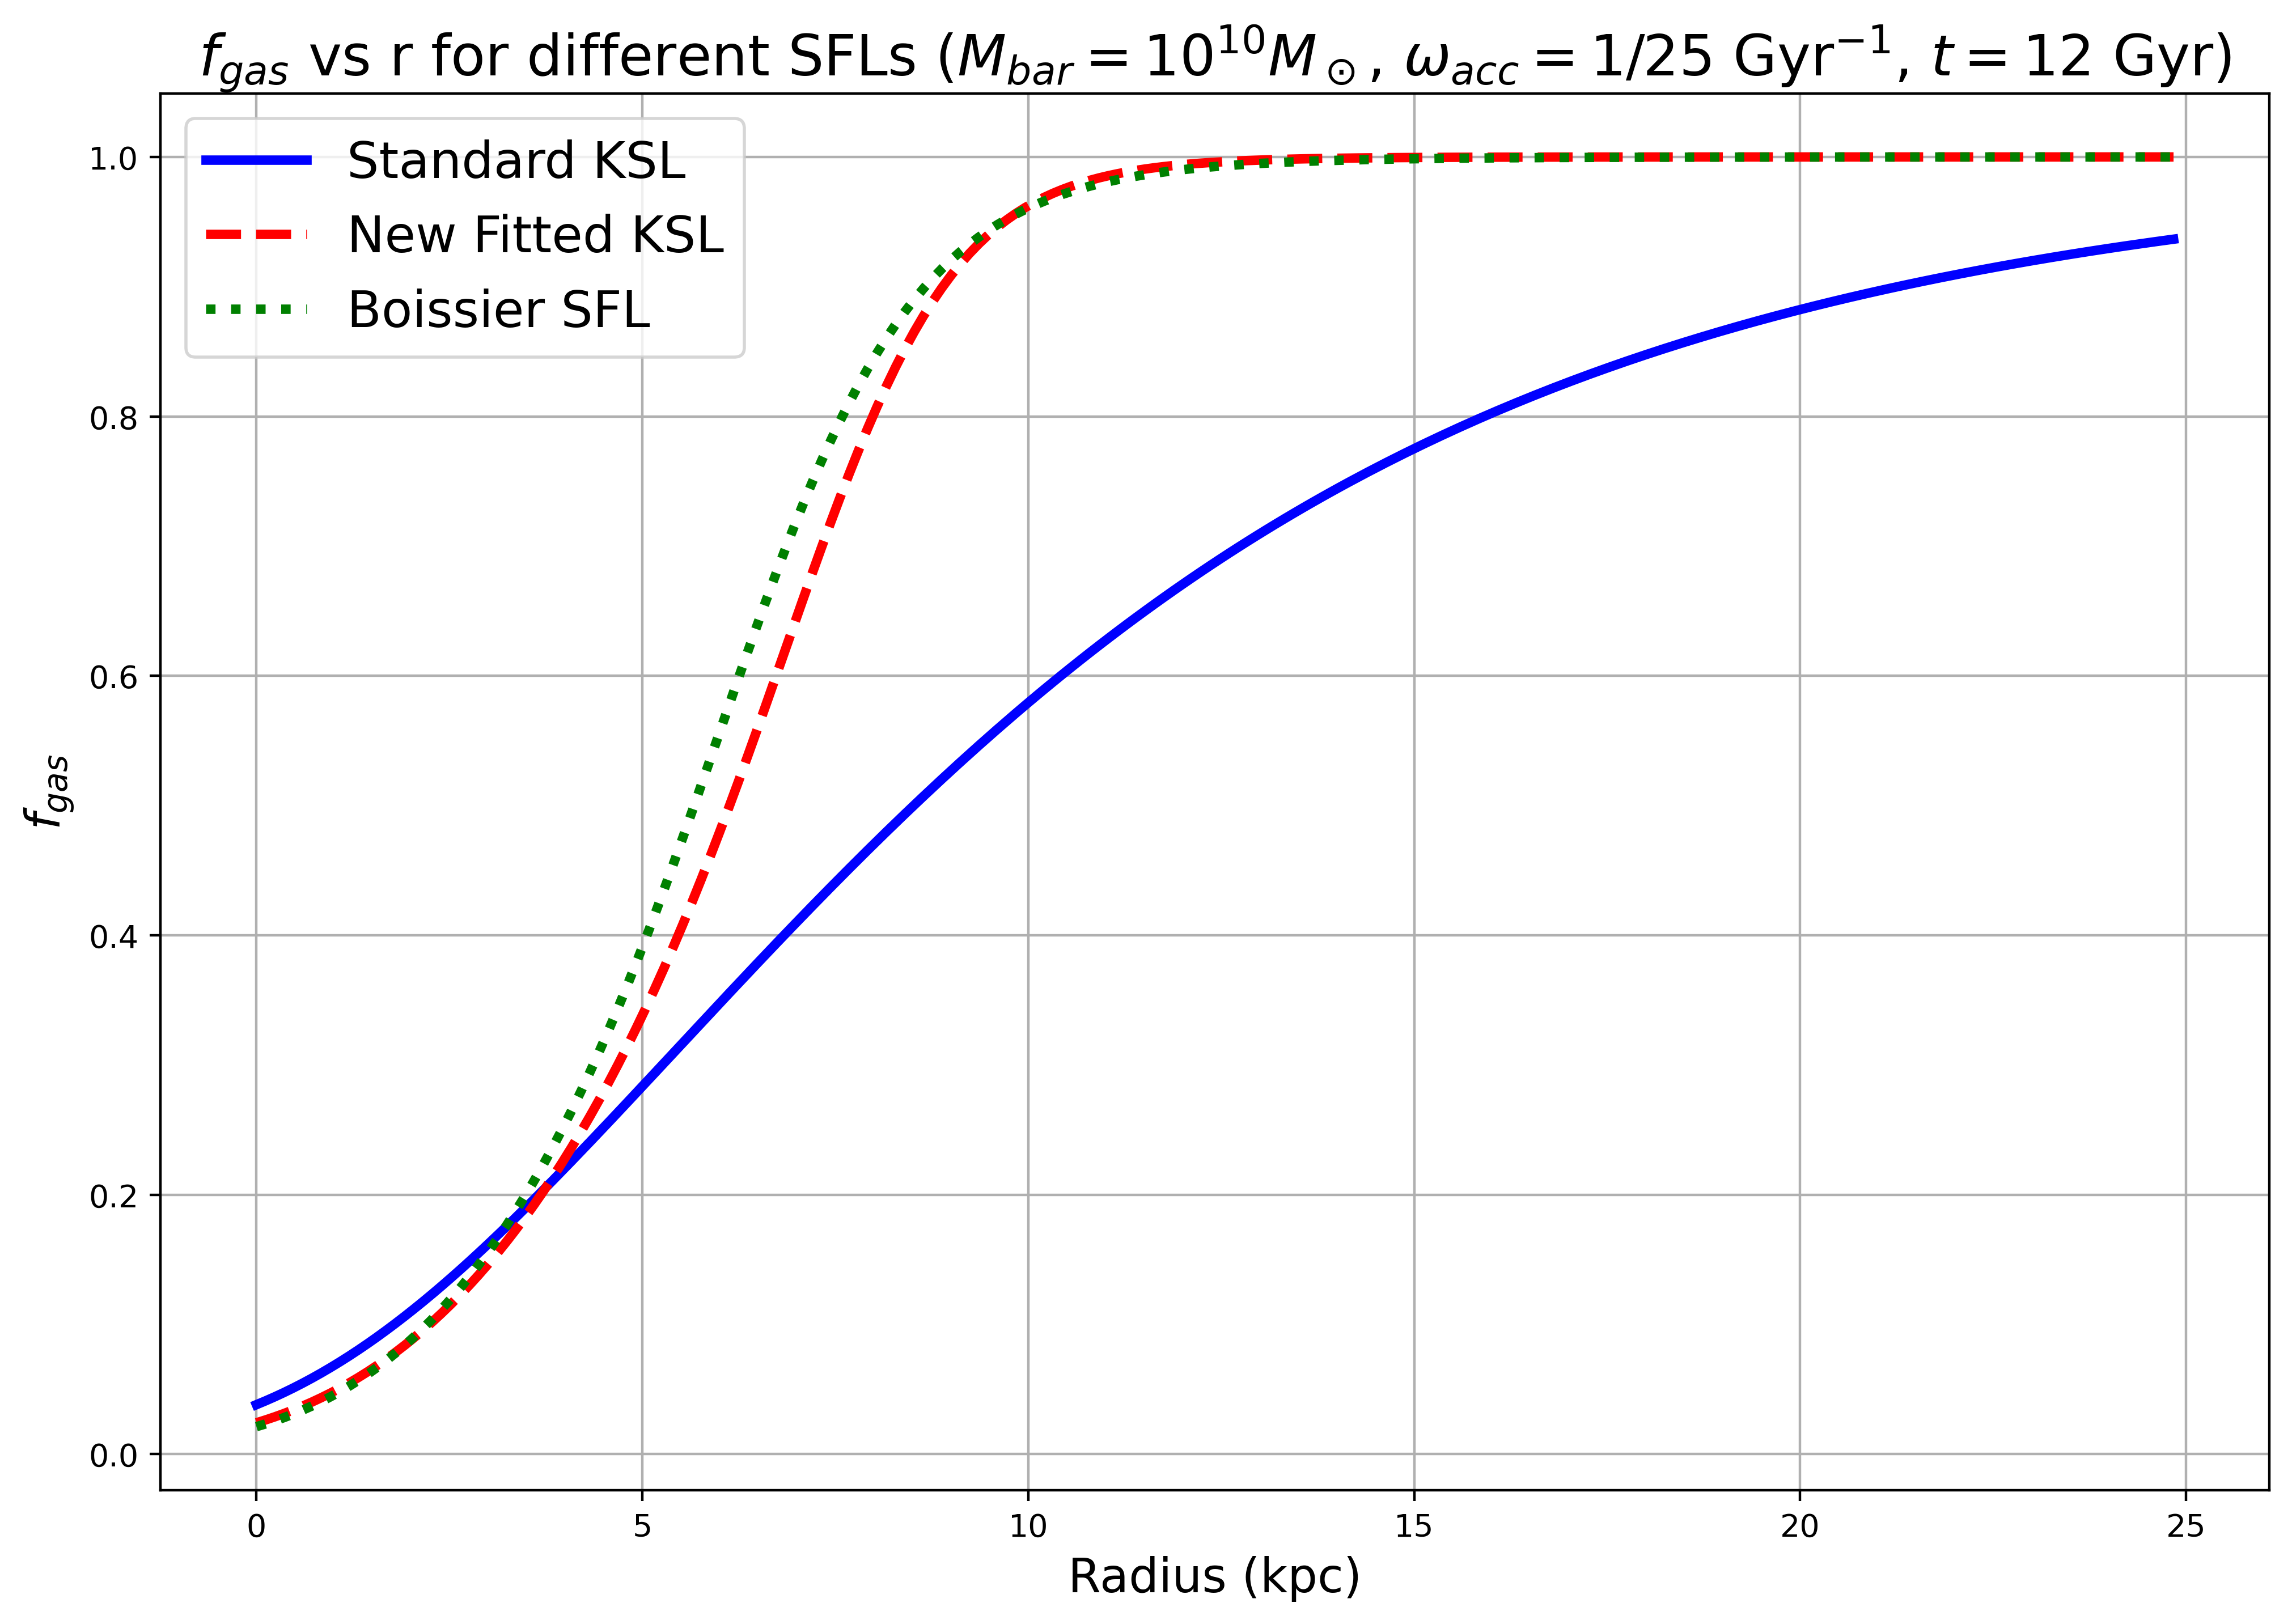

In [11]:
middle_fractions = np.array([f_gas_radial_old_ksl_10[1], f_gas_radial_new_ksl_10[1], f_gas_radial_boissier_10[1]])

SFLS = np.array(['Standard KSL', 'New Fitted KSL', 'Boissier SFL'])
colors = ['b', 'r', 'g']
styles = ['solid', 'dashed', 'dotted']

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_fractions, SFLS, colors, styles):
    frame.plot(r[:index_r1]/1000, M1[:index_r1,index_t4], label=sfl, linestyle=sty, color=col, lw=3)
#frame.scatter(NGC0925_r_obs_HI, NGC0925_Sigma_gas_obs/(NGC0925_Sigma_gas_obs+NGC0925_Sigma_star_obs), label=r"NGC0925", c='k', s=50)
frame.set_title(r"$f_{gas}$ vs r for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = 1/25$ Gyr$^{-1}$, $t=12$ Gyr)", fontsize = 18)
frame.set_xlabel("Radius (kpc)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.tick_params(labelsize=14)
frame.grid()
show()

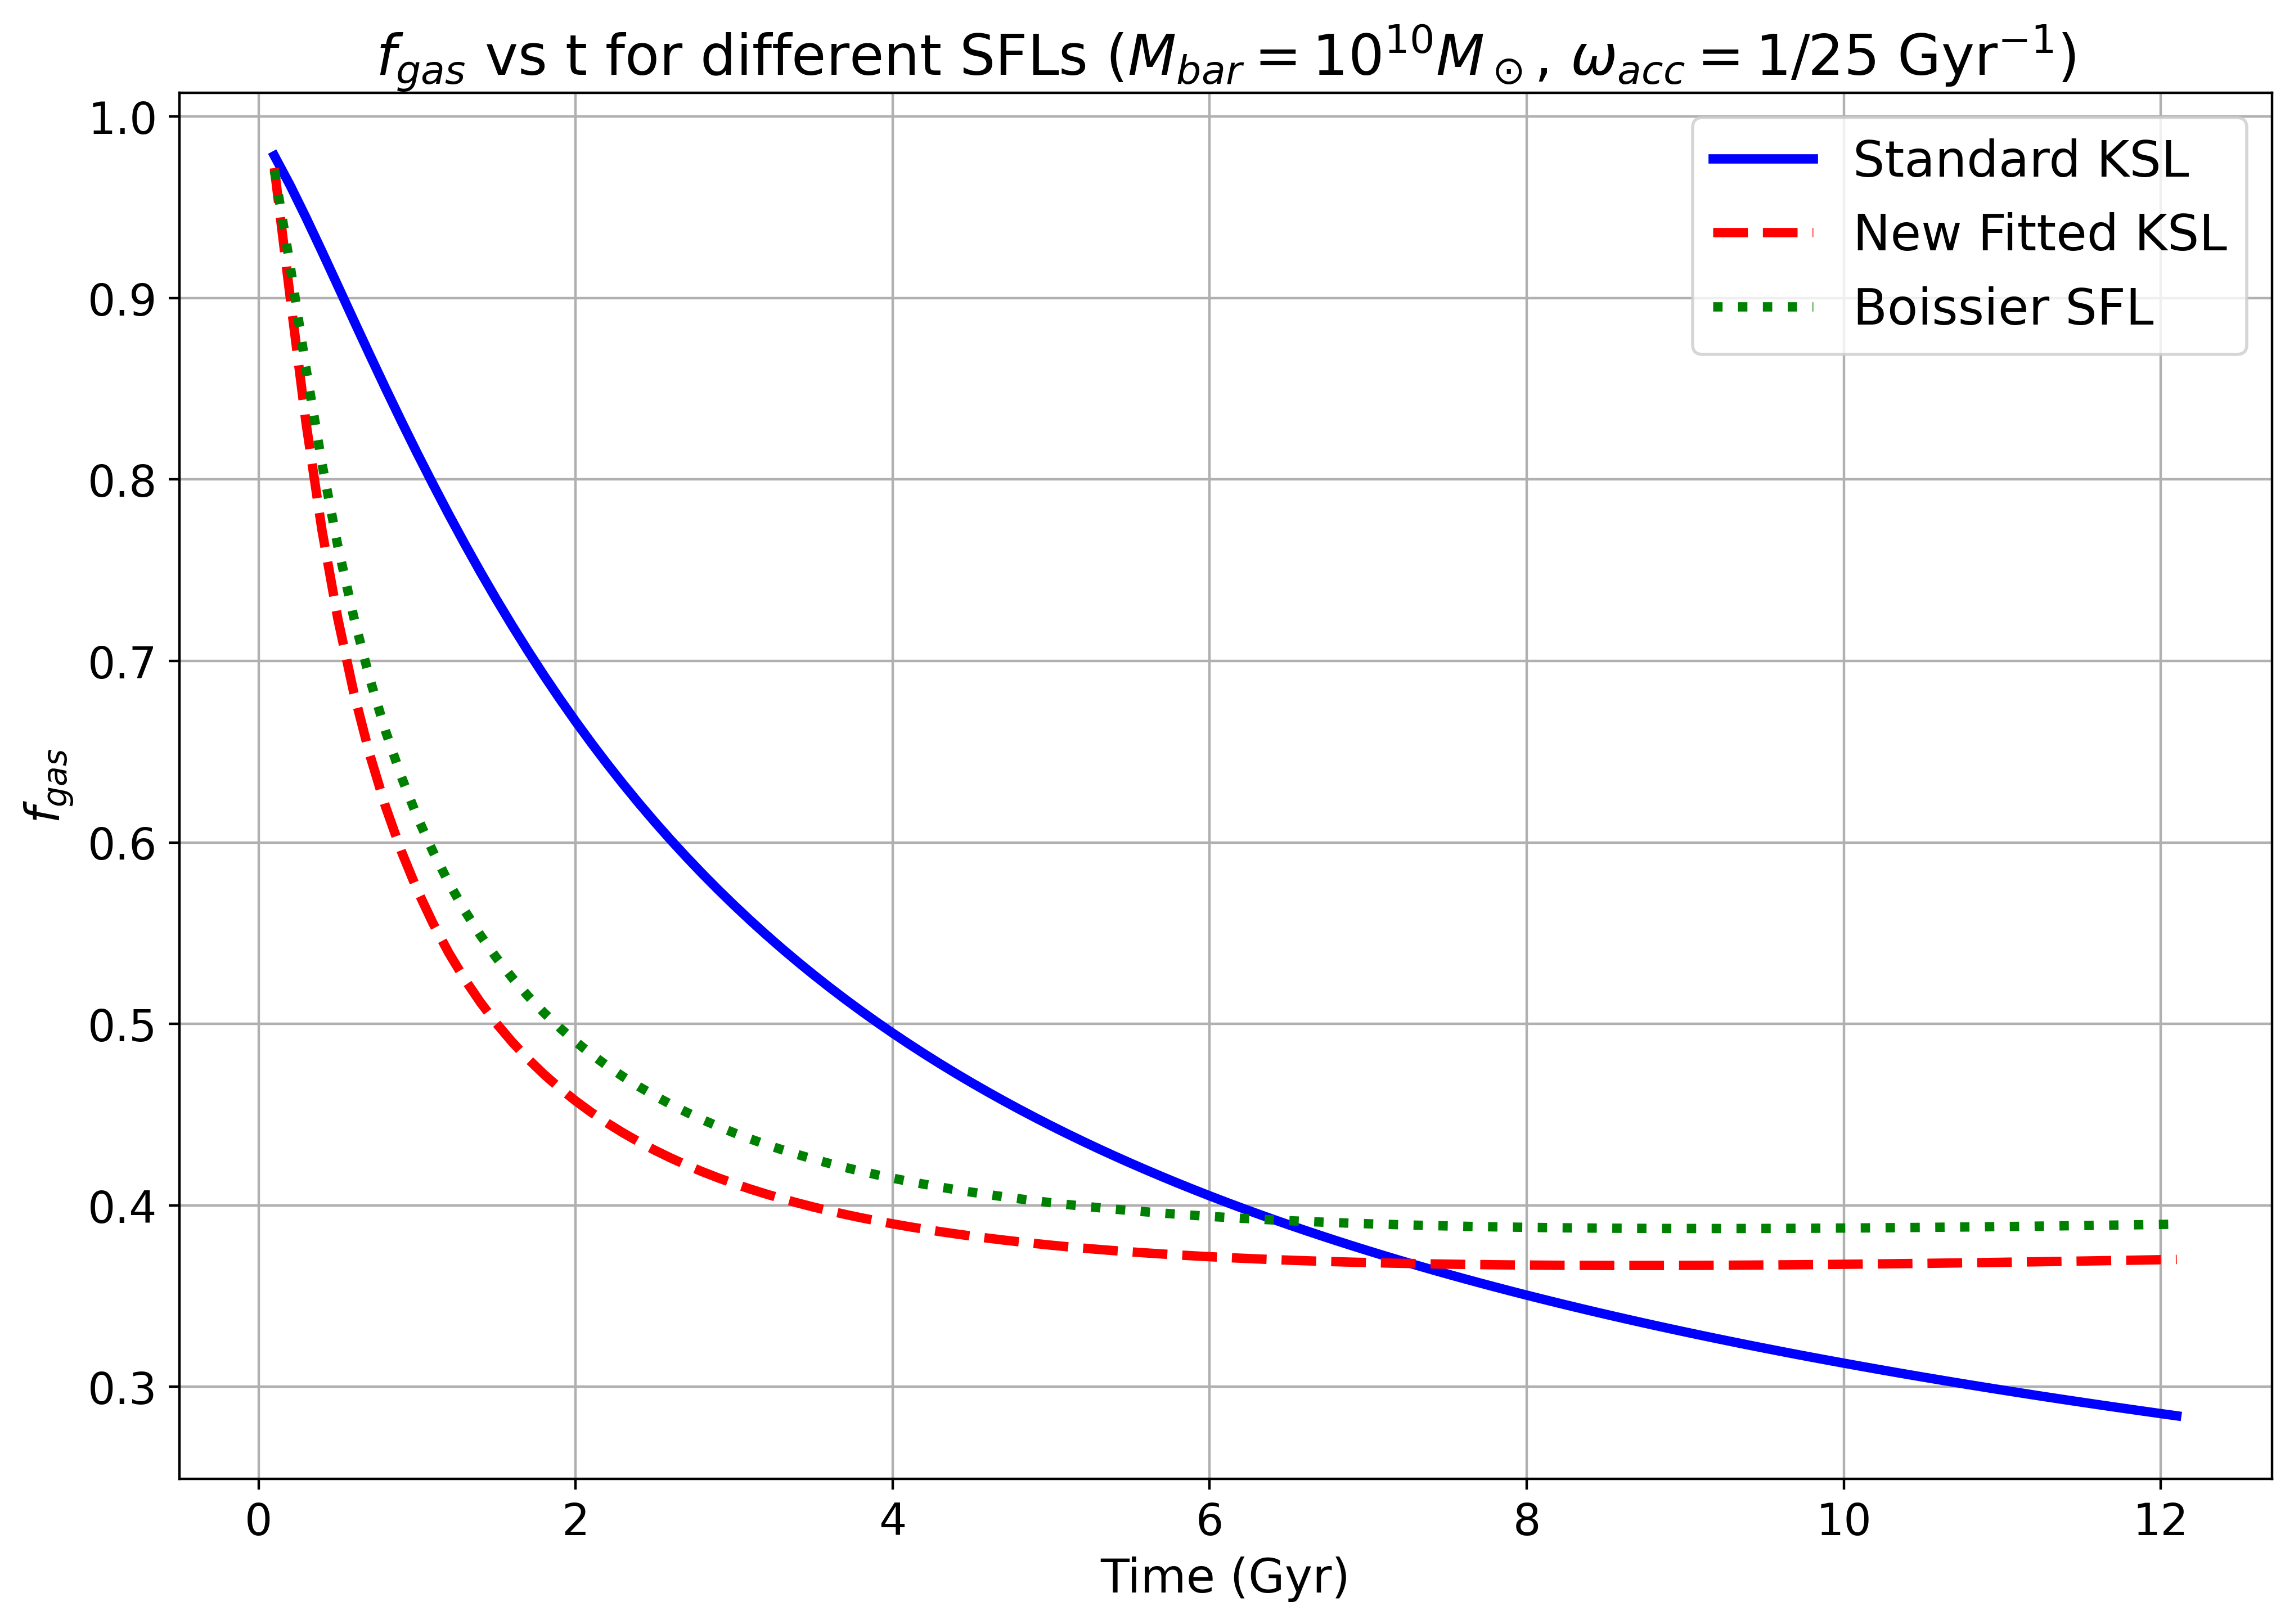

In [42]:
middle_fractions_global = np.array([f_gas_old_ksl_10[1], f_gas_new_ksl_10[1], f_gas_boissier_10[1]])

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_fractions_global, SFLS, colors, styles):
    frame.plot(M_times1, M1, label=sfl, linestyle=sty, color=col, lw=3)
frame.set_title(r"$f_{gas}$ vs t for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = 1/25$ Gyr$^{-1}$)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.tick_params(labelsize=14)
frame.grid()
show()

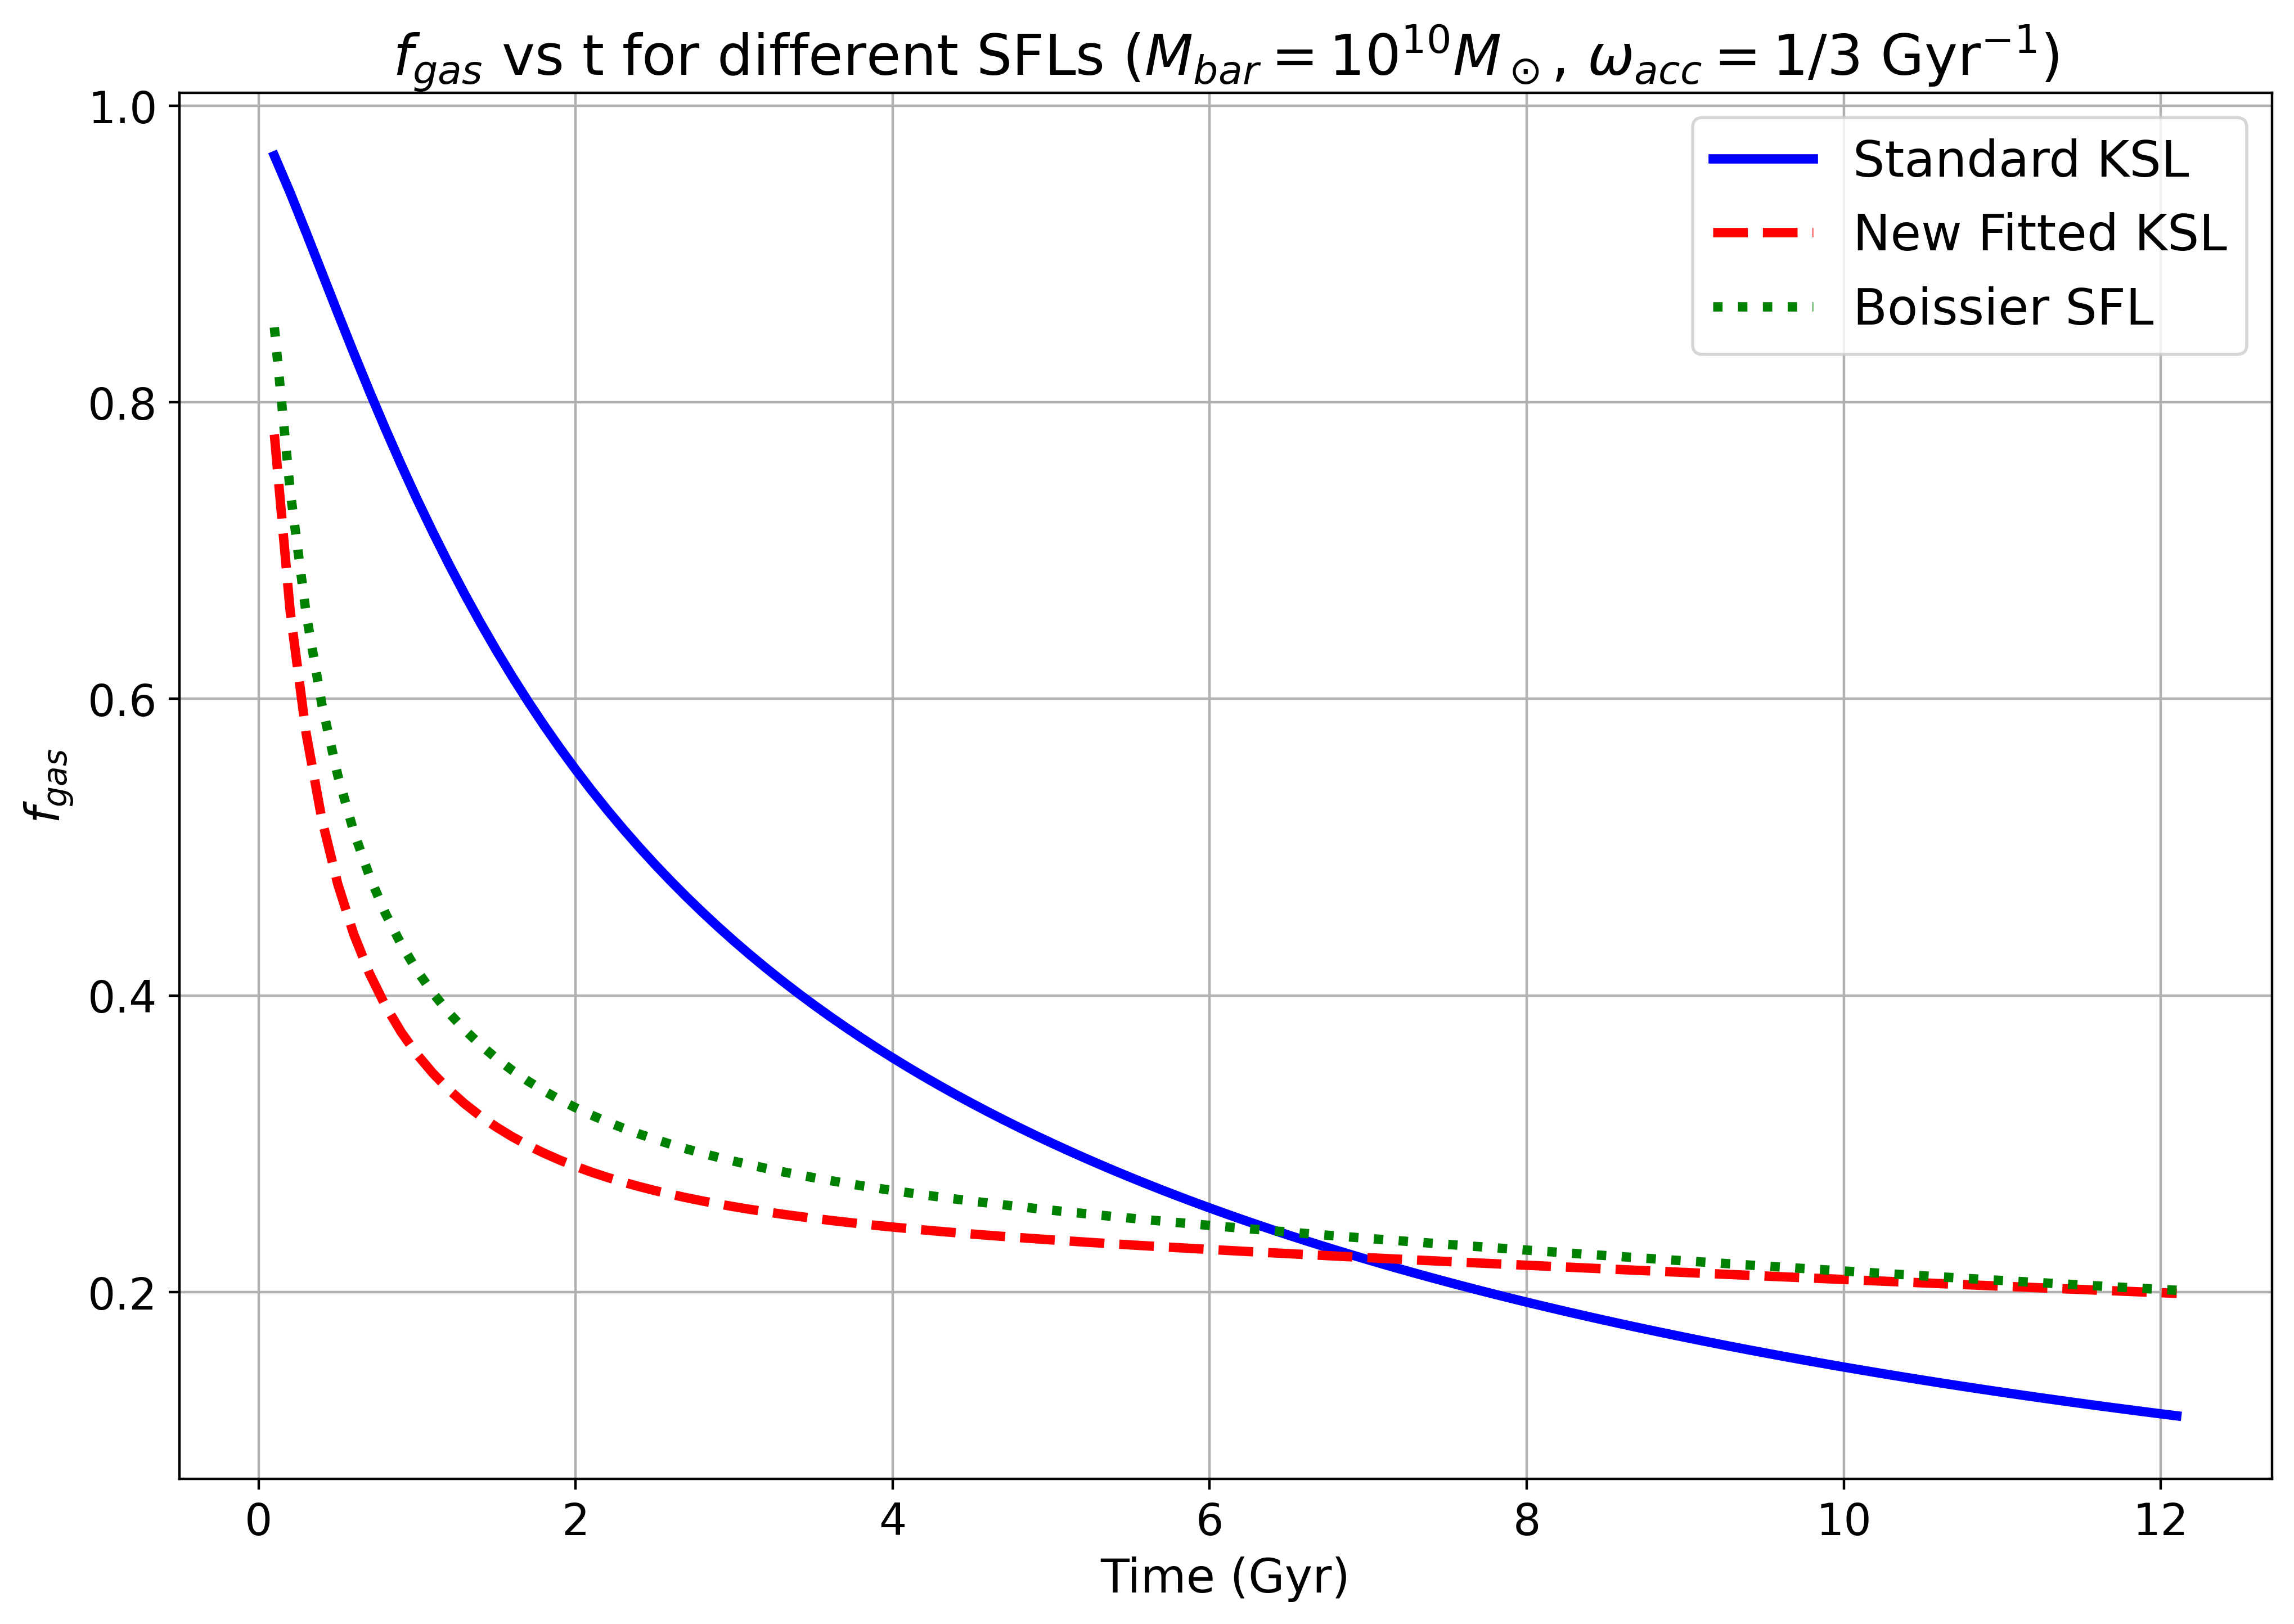

In [43]:
middle_fractions_global = np.array([f_gas_old_ksl_10[0], f_gas_new_ksl_10[0], f_gas_boissier_10[0]])

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_fractions_global, SFLS, colors, styles):
    frame.plot(M_times1, M1, label=sfl, linestyle=sty, color=col, lw=3)
frame.set_title(r"$f_{gas}$ vs t for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = 1/3$ Gyr$^{-1}$)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.tick_params(labelsize=14)
frame.grid()
show()

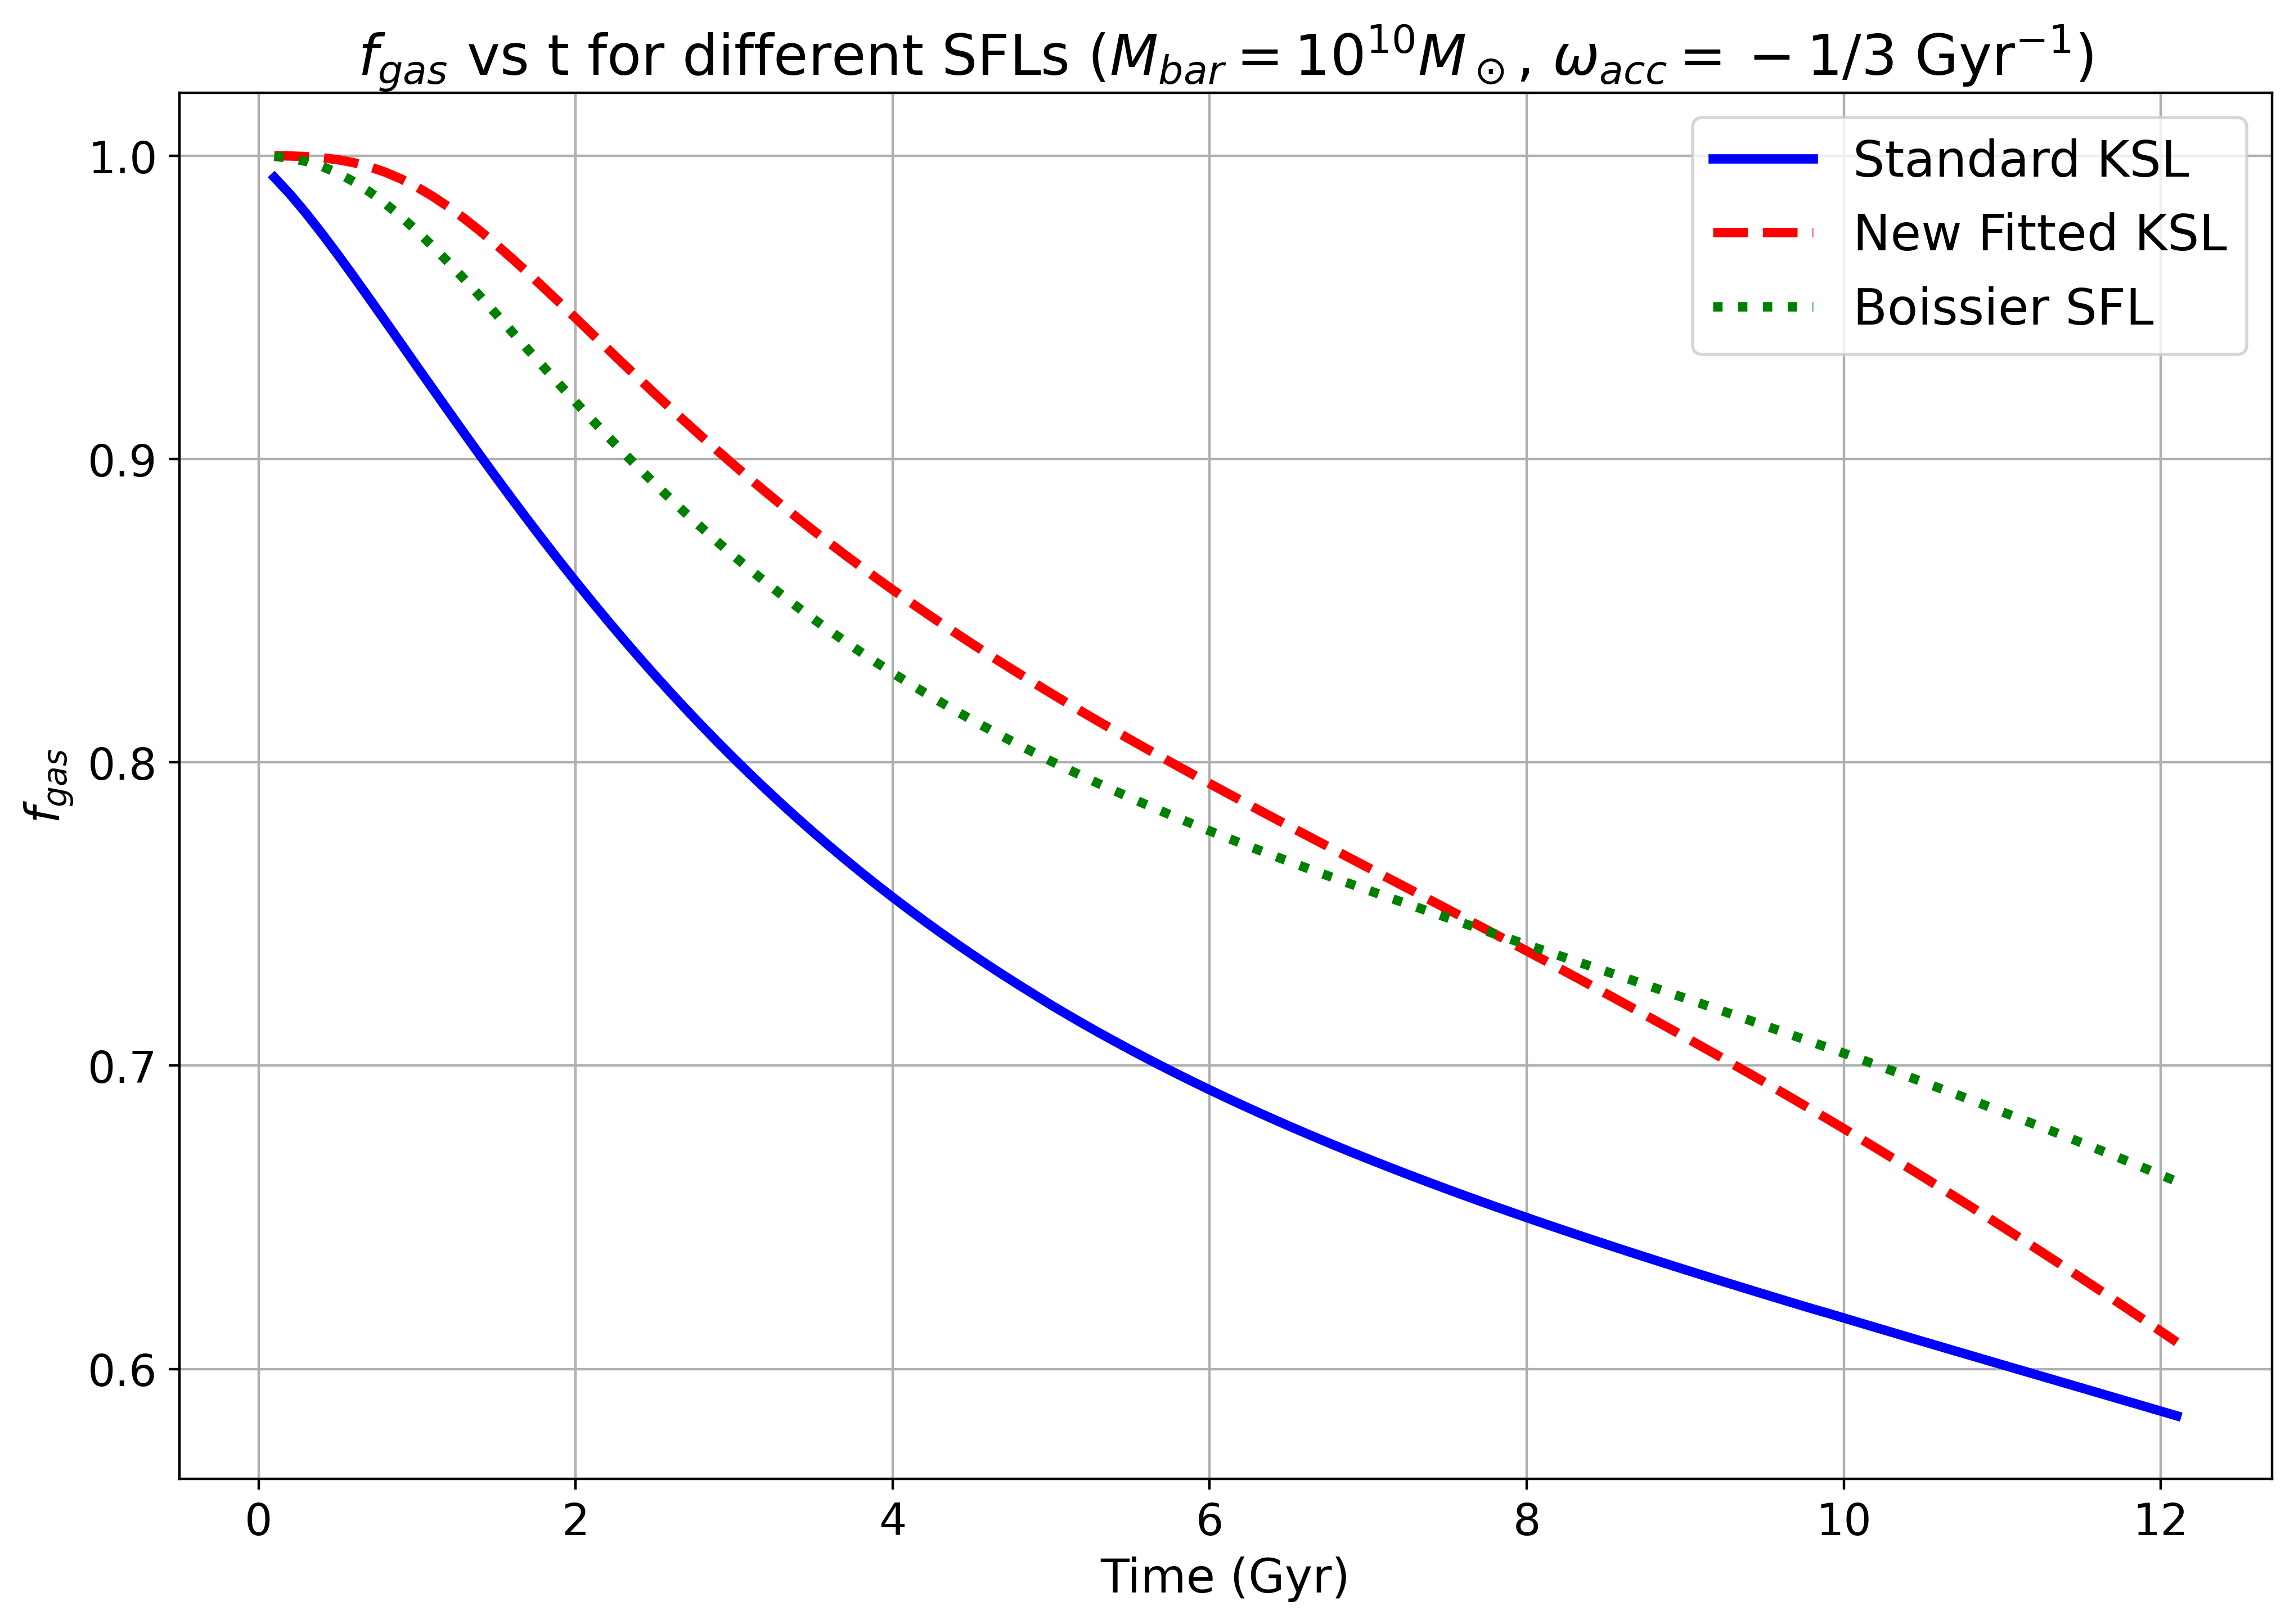

In [44]:
middle_fractions_global = np.array([f_gas_old_ksl_10[2], f_gas_new_ksl_10[2], f_gas_boissier_10[2]])

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_fractions_global, SFLS, colors, styles):
    frame.plot(M_times1, M1, label=sfl, linestyle=sty, color=col, lw=3)
frame.set_title(r"$f_{gas}$ vs t for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = -1/3$ Gyr$^{-1}$)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$f_{gas}$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.tick_params(labelsize=14)
frame.grid()
show()

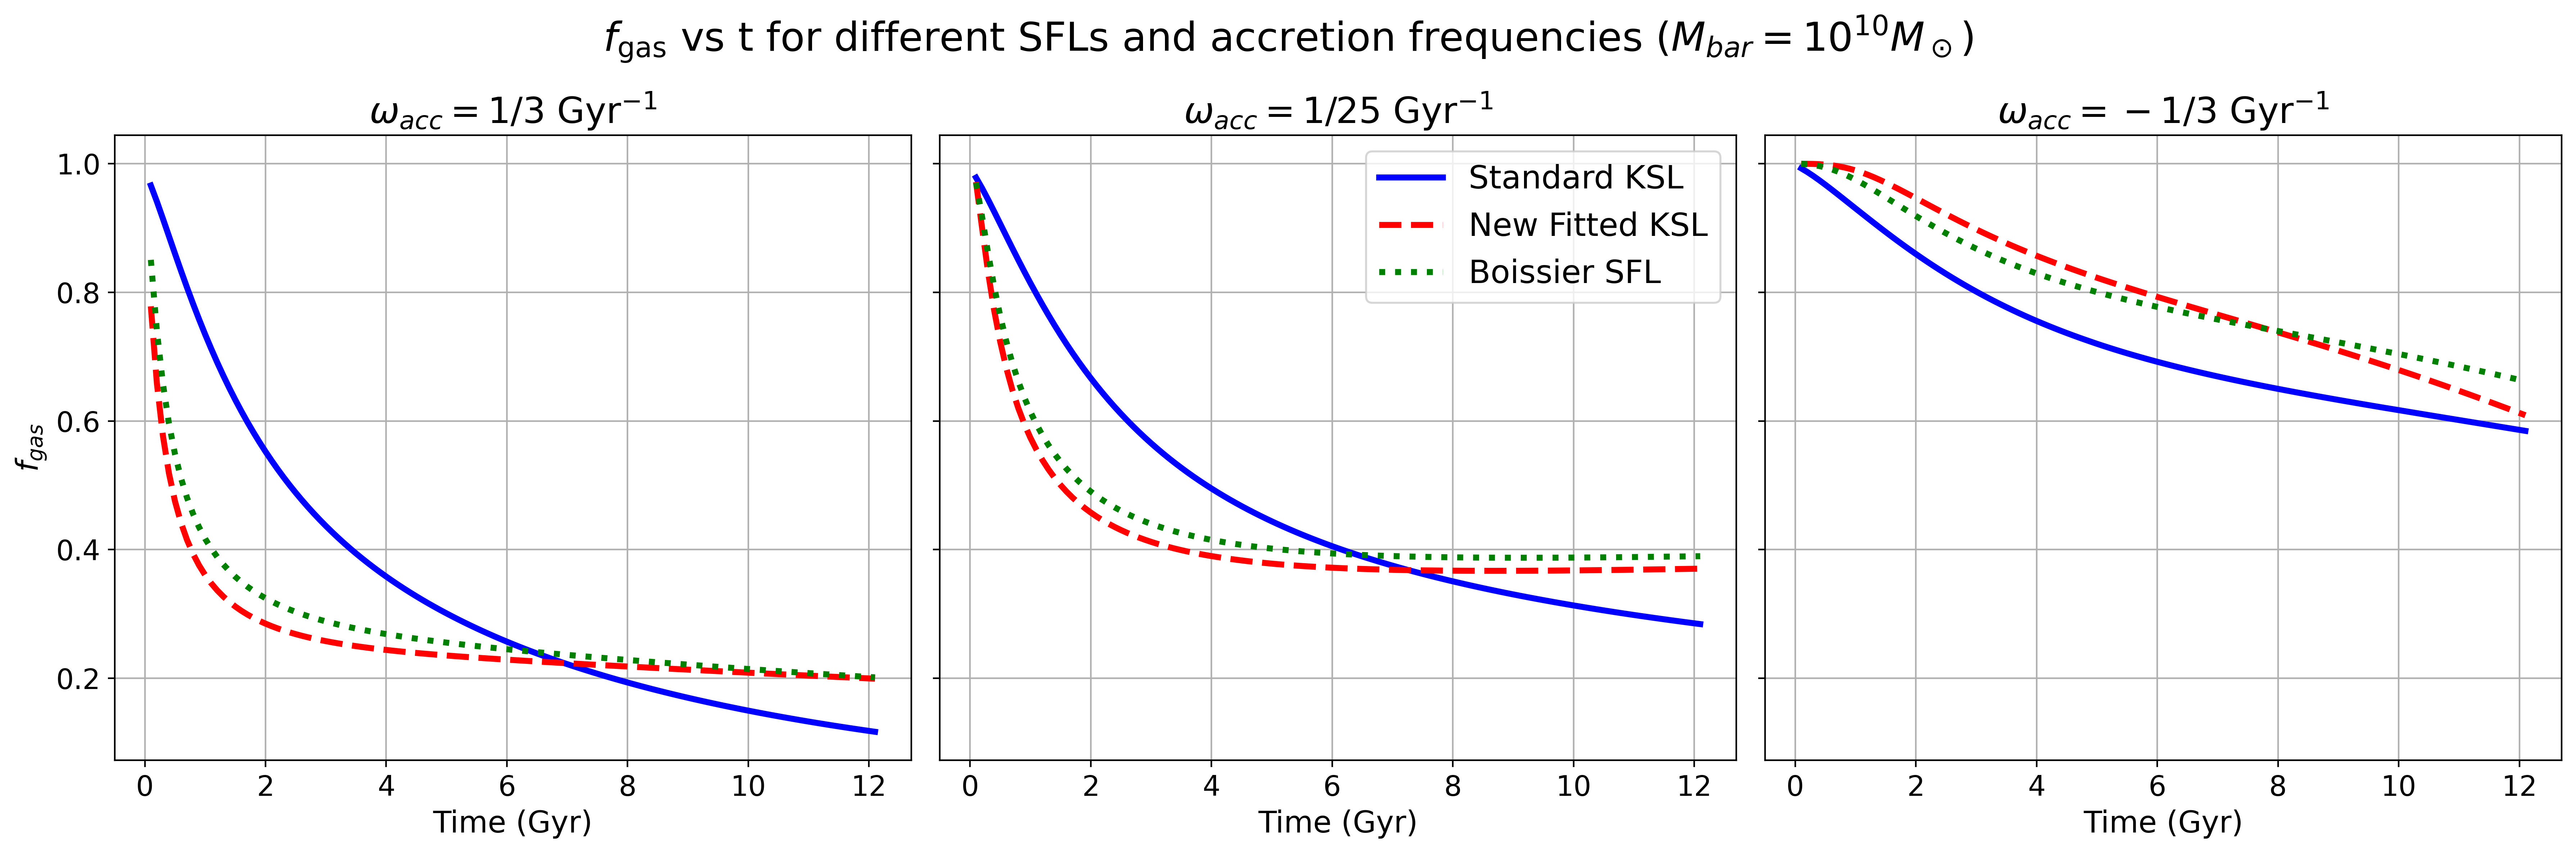

In [60]:
# Create a figure with three subplots in a row
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey='row', figsize=(18, 6), dpi=400, facecolor='w')

fig.suptitle(r"$f_{\mathrm{gas}}$ vs t for different SFLs and accretion frequencies ($M_{bar}=10^{10}M_\odot$)", fontsize=20)

titles = [
    r"$\omega_{acc} = 1/3$ Gyr$^{-1}$",
    r"$\omega_{acc} = 1/25$ Gyr$^{-1}$",
    r"$\omega_{acc} = -1/3$ Gyr$^{-1}$"
]
data_sets = [
    [f_gas_old_ksl_10[0], f_gas_new_ksl_10[0], f_gas_boissier_10[0]],
    [f_gas_old_ksl_10[1], f_gas_new_ksl_10[1], f_gas_boissier_10[1]],
    [f_gas_old_ksl_10[2], f_gas_new_ksl_10[2], f_gas_boissier_10[2]]
]

# Set the labels and titles of the subplots
for i, ax, title, data in zip(range(3), axes, titles, data_sets):
    for M1, sfl, col, sty in zip(data, SFLS, colors, styles):
        ax.plot(M_times1, M1, label=sfl, linestyle=sty, color=col, lw=3)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel("Time (Gyr)", fontsize=15)
    if i == 0:
        ax.set_ylabel(r"$f_{gas}$", fontsize=15)
    ax.tick_params(labelsize=14)
    ax.grid()

# Add a legend to the middle plot
axes[1].legend(prop={'size': 16})

plt.tight_layout()
show()

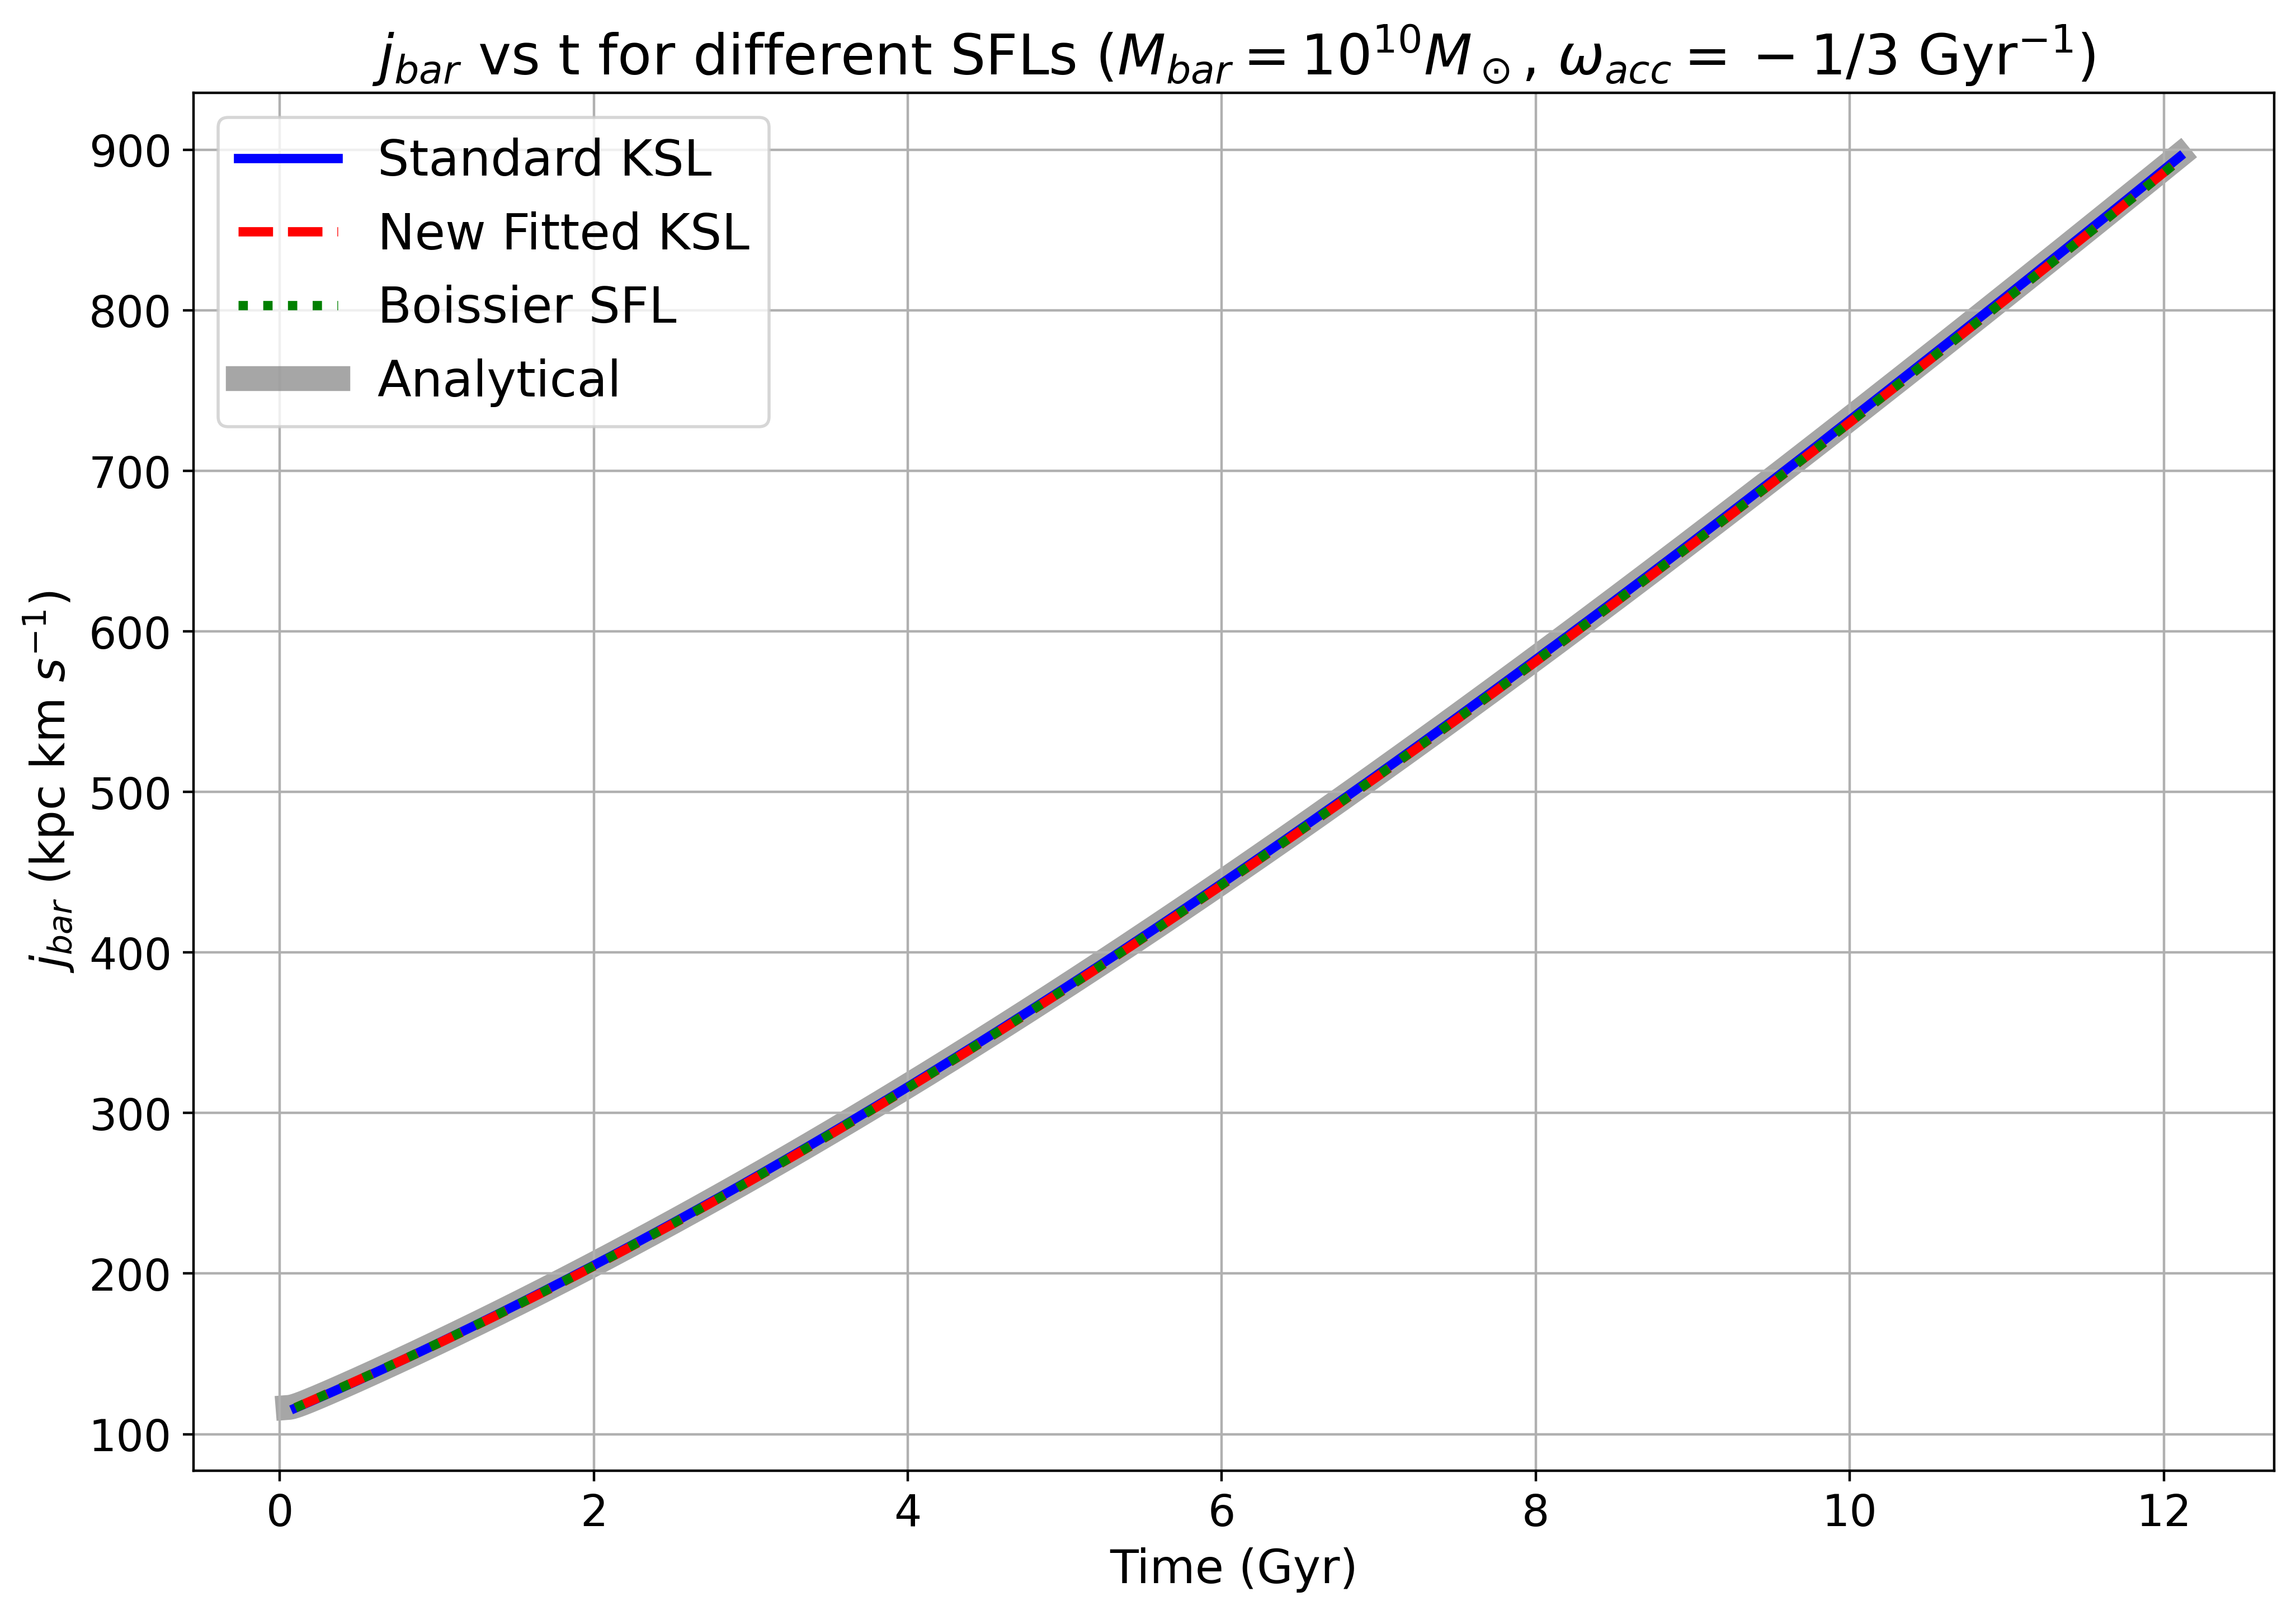

In [41]:
middle_jbar = np.array([j_bar_old_ksl_10[2], j_bar_new_ksl_10[2], j_bar_boissier_10[2]])
M_times2 = np.arange(0, 12.101, 0.001)

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_jbar, SFLS, colors, styles):
    frame.plot(M_times1, M1/1000, label=sfl, linestyle=sty, color=col, lw=3)
frame.plot(M_times2[53:], j_bar_analytical[53:], label=r"Analytical", c='grey', lw=8, zorder=0, alpha=0.7)
frame.set_title(r"$j_{bar}$ vs t for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = -1/3$ Gyr$^{-1}$)", fontsize = 18)
frame.set_xlabel("Time (Gyr)", fontsize = 15)
frame.set_ylabel(r"$j_{bar}$ (kpc km $s^{-1}$)", fontsize = 15)
frame.legend(prop={'size': 16})
frame.tick_params(labelsize=14)
frame.grid()
show()

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(15, 10))

# Set the labels and titles of the subplots
fig.suptitle(r"$\Sigma_{gas}$ vs r for different t and $t_{acc}$ ($M_{bar}=10^8M_\odot$)", fontsize = 18)
fig.supxlabel("Radius (kpc)", fontsize = 15)
fig.supylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
    
for i, M1, M2, M3, t_accr in zip(range(3), Sigma_gas_old_ksl_8, Sigma_gas_new_ksl_8, Sigma_gas_boissier_8, t_acc_array):
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[0,i].set_title(r"Old KSL $\omega_{acc}=$"+f"1/{t_accr:.0f}Gyr")
    
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[1,i].set_title(r"New KSL $\omega_{acc}=$"+f"1/{t_accr:.0f}Gyr")
    
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[2,i].set_title(r"Boissier SFL $\omega_{acc}=$"+f"1/{t_accr:.0f}Gyr")
    
    axes[0,i].legend()
    axes[1,i].legend()
    axes[2,i].legend()
    
# Add grid lines to each subplot and adjust layout
for axe in axes:
    for ax in axe:
        ax.grid(True)

plt.tight_layout()
show()

In [16]:
t_acc_array2 = np.array([3.0, 25.0, -3.0])
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(15, 10))

# Set the labels and titles of the subplots
fig.suptitle(r"$\Sigma_{gas}$ vs r for different t and $t_{acc}$ ($M_{bar}=10^{10}M_\odot$)", fontsize = 18)
fig.supxlabel("Radius (kpc)", fontsize = 15)
fig.supylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
    
for i, M1, M2, M3, t_accr in zip(range(3), Sigma_gas_old_ksl_10, Sigma_gas_new_ksl_10, Sigma_gas_boissier_10, t_acc_array2):
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[0,i].set_title(fr"Standard KSL $\omega_{{acc}}=${Fraction(1,int(t_accr))}Gyr")
    
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[1,i].set_title(fr"New KSL $\omega_{{acc}}=${Fraction(1,int(t_accr))}Gyr")
    
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[2,i].set_title(fr"Boissier SFL $\omega_{{acc}}=${Fraction(1,int(t_accr))}Gyr")
    
    axes[0,i].legend()
    axes[1,i].legend()
    axes[2,i].legend()
    
# Add grid lines to each subplot and adjust layout
for axe in axes:
    for ax in axe:
        ax.grid(True)
        ax.tick_params(labelsize=14)

plt.tight_layout()
show()

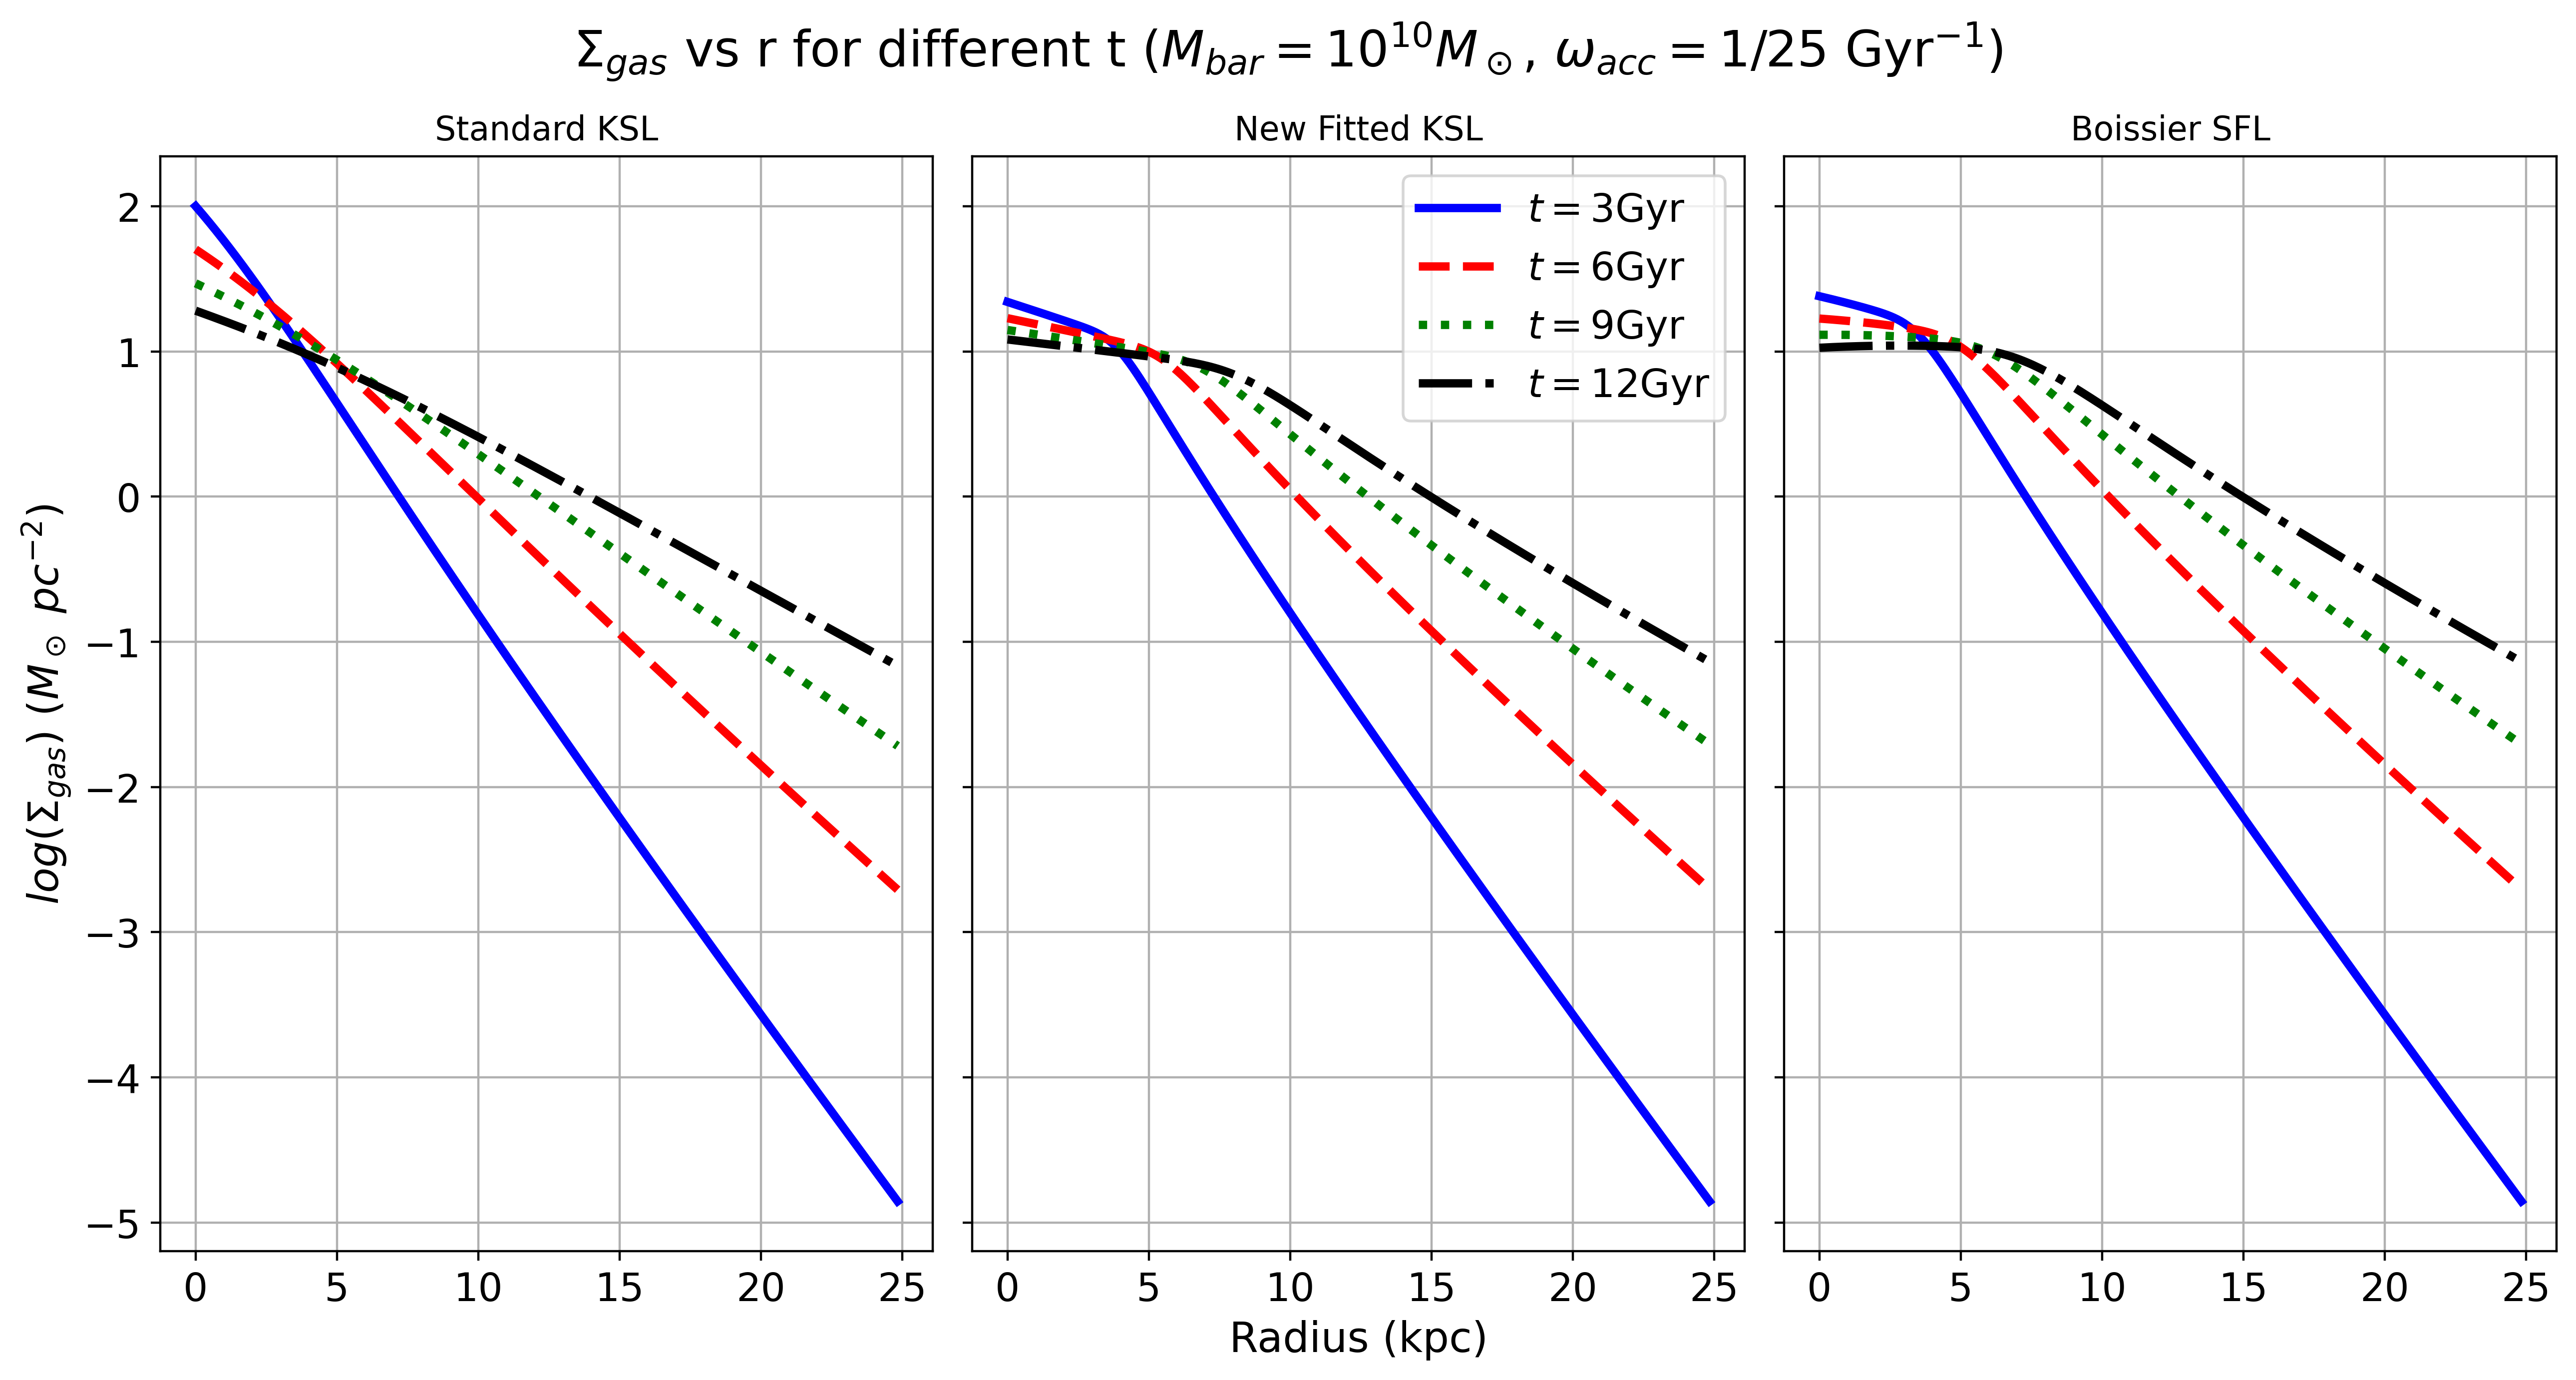

In [46]:
middle_sigmas = np.array([Sigma_gas_old_ksl_10[1], Sigma_gas_new_ksl_10[1], Sigma_gas_boissier_10[1]])

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey="row", figsize=(13, 7), dpi=400, facecolor='w')

# Set the labels and titles of the subplots
f1 = axes[0]
f2 = axes[1]
f3 = axes[2]
fig.suptitle(r"$\Sigma_{gas}$ vs r for different t ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = 1/25$ Gyr$^{-1}$)", fontsize = 18)
f2.set_xlabel("Radius (kpc)", fontsize = 15)
f1.set_ylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
f1.set_title("Standard KSL")
f2.set_title("New Fitted KSL")
f3.set_title("Boissier SFL")

for i, M1, t_accr in zip(range(3), middle_sigmas, t_acc_array2):
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    
    
f2.legend(prop={"size": 14})
# Add grid lines to each subplot and adjust layout
for ax in axes:
    ax.grid(True)
    ax.tick_params(labelsize=14)

plt.tight_layout()
show()

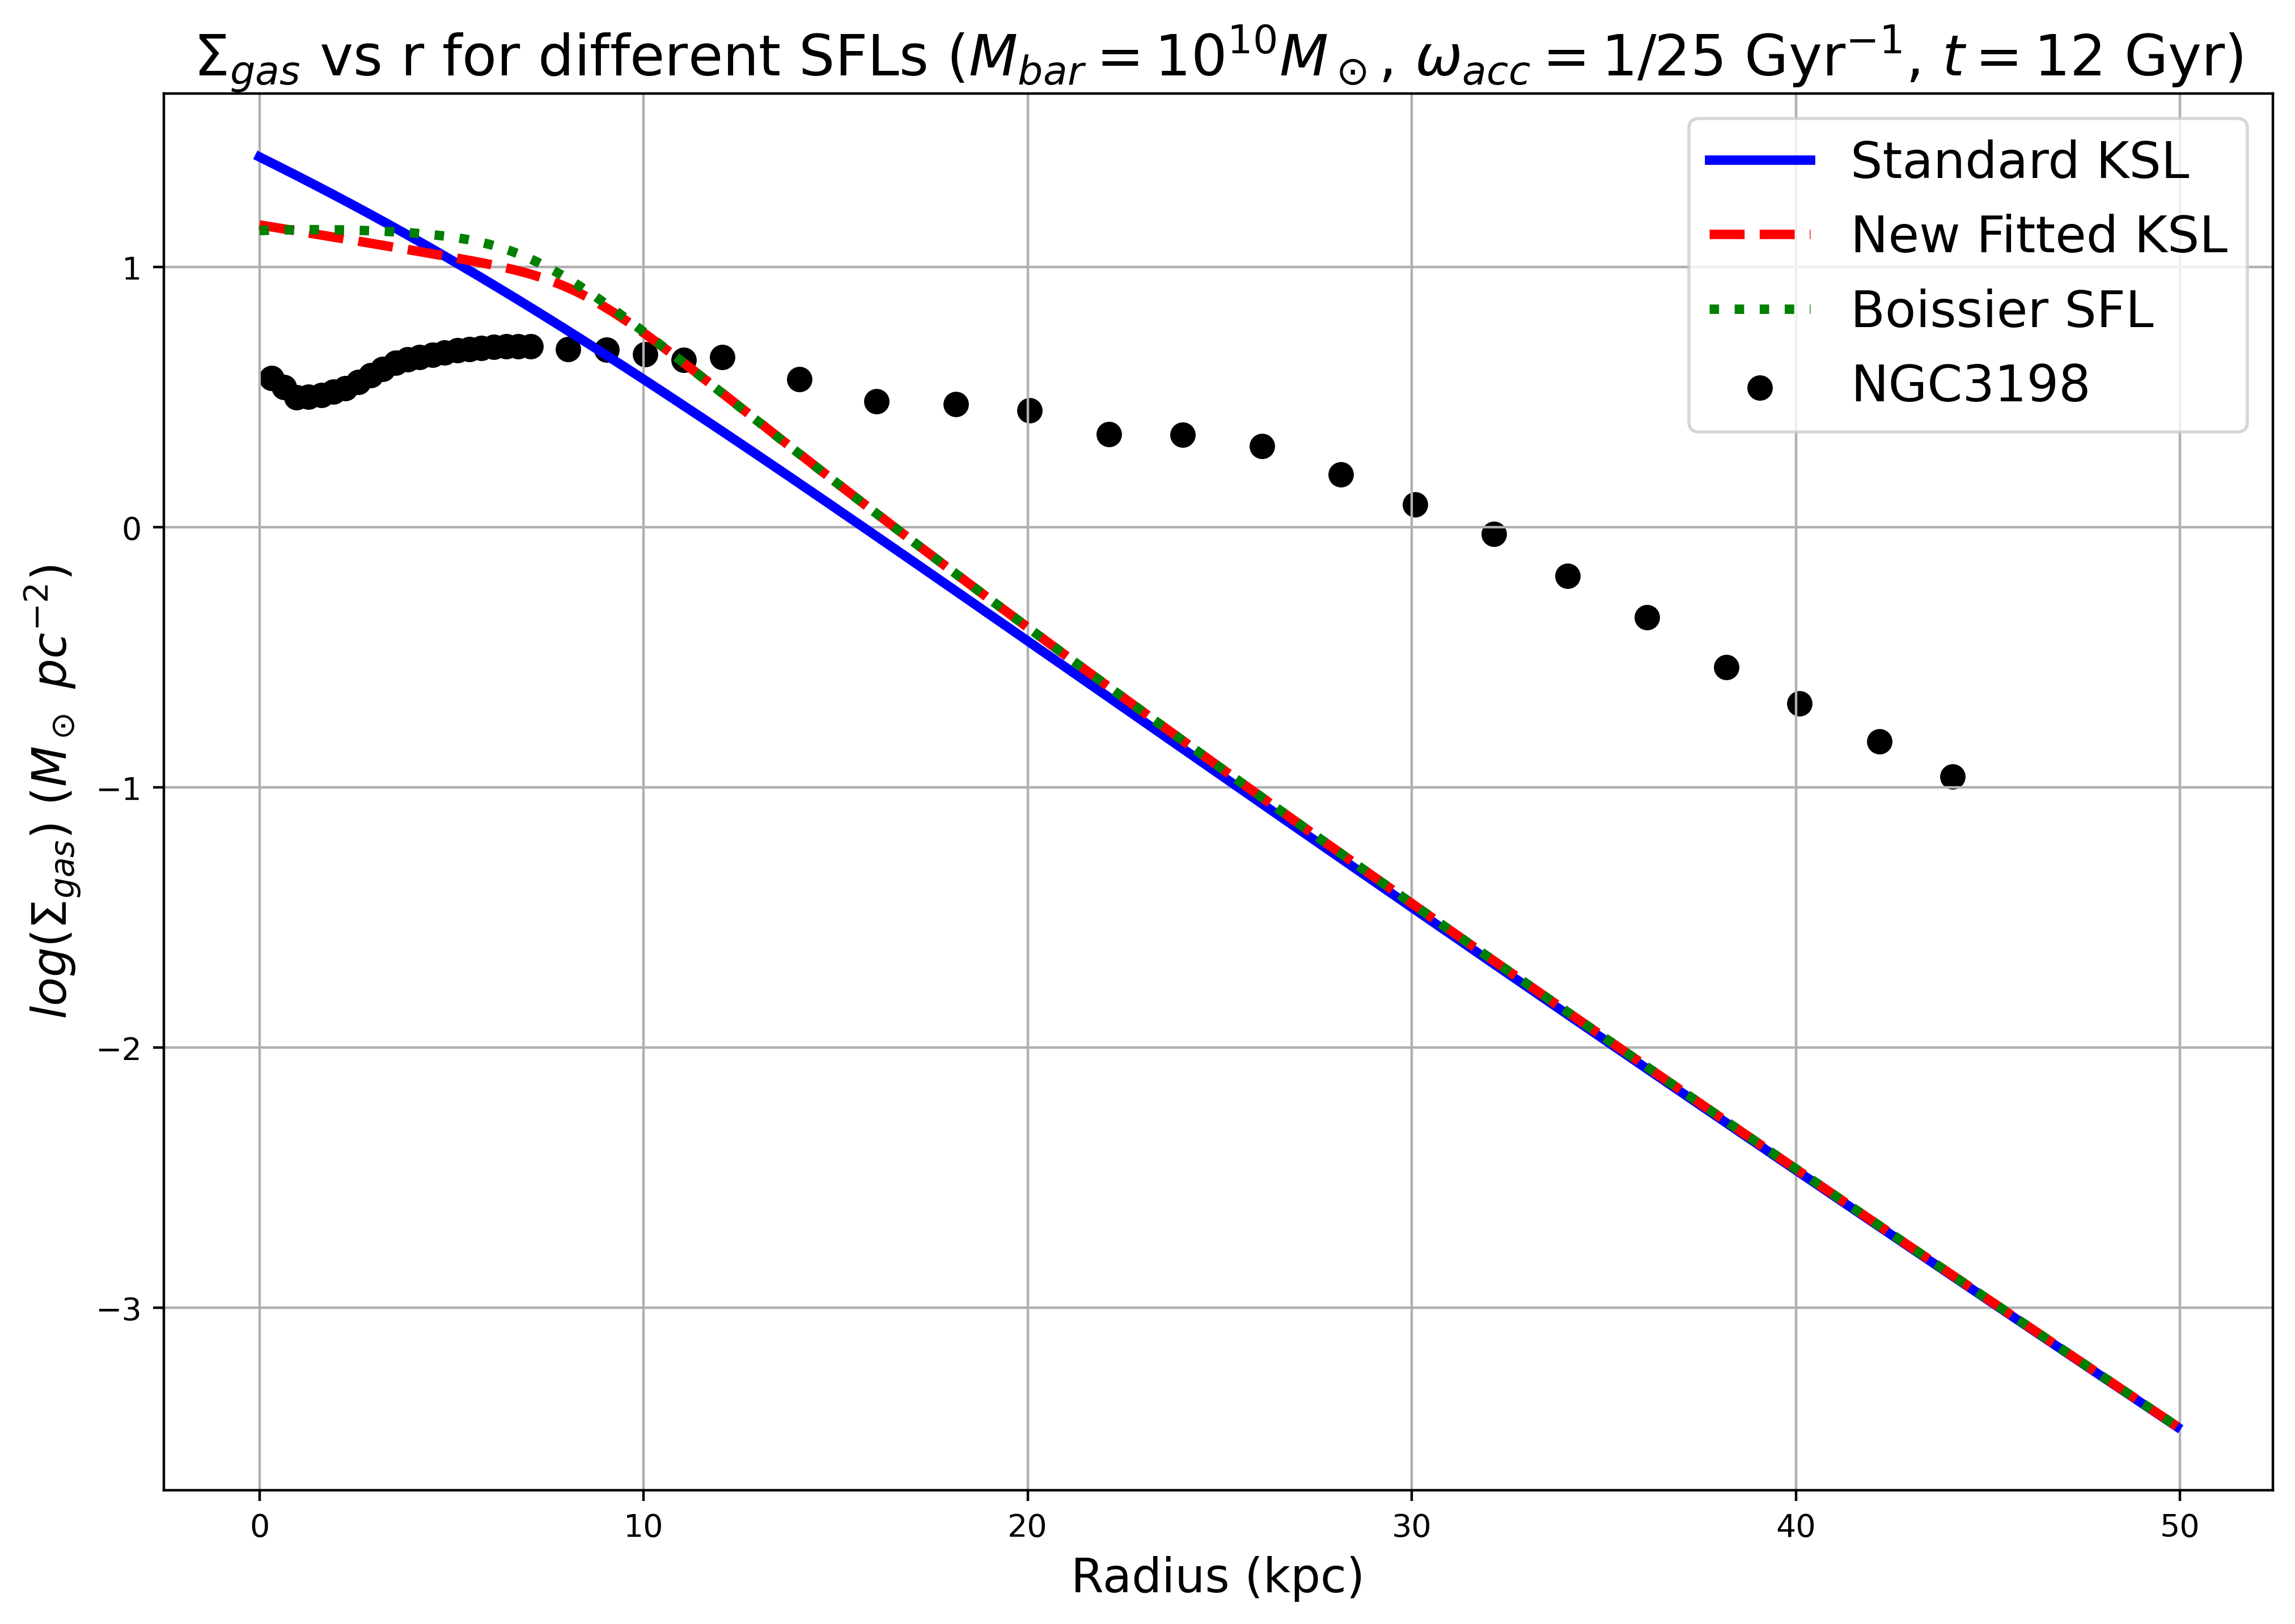

In [73]:
middle_sigmas_gas = np.array([Sigma_gas_old_ksl_10[1], Sigma_gas_new_ksl_10[1], Sigma_gas_boissier_10[1]])

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_sigmas_gas, SFLS, colors, styles):
    frame.plot(r[:index_r2]/1000, np.log10(M1[:index_r2,index_t4]), label=sfl, linestyle=sty, color=col, lw=3)
frame.scatter(NGC3198_r_obs_HI, np.log10(NGC3198_Sigma_gas_obs), label=r"NGC3198", c='k', s=50)
frame.set_title(r"$\Sigma_{gas}$ vs r for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = 1/25$ Gyr$^{-1}$, $t=12$ Gyr)", fontsize = 18)
frame.set_xlabel("Radius (kpc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.grid()
show()

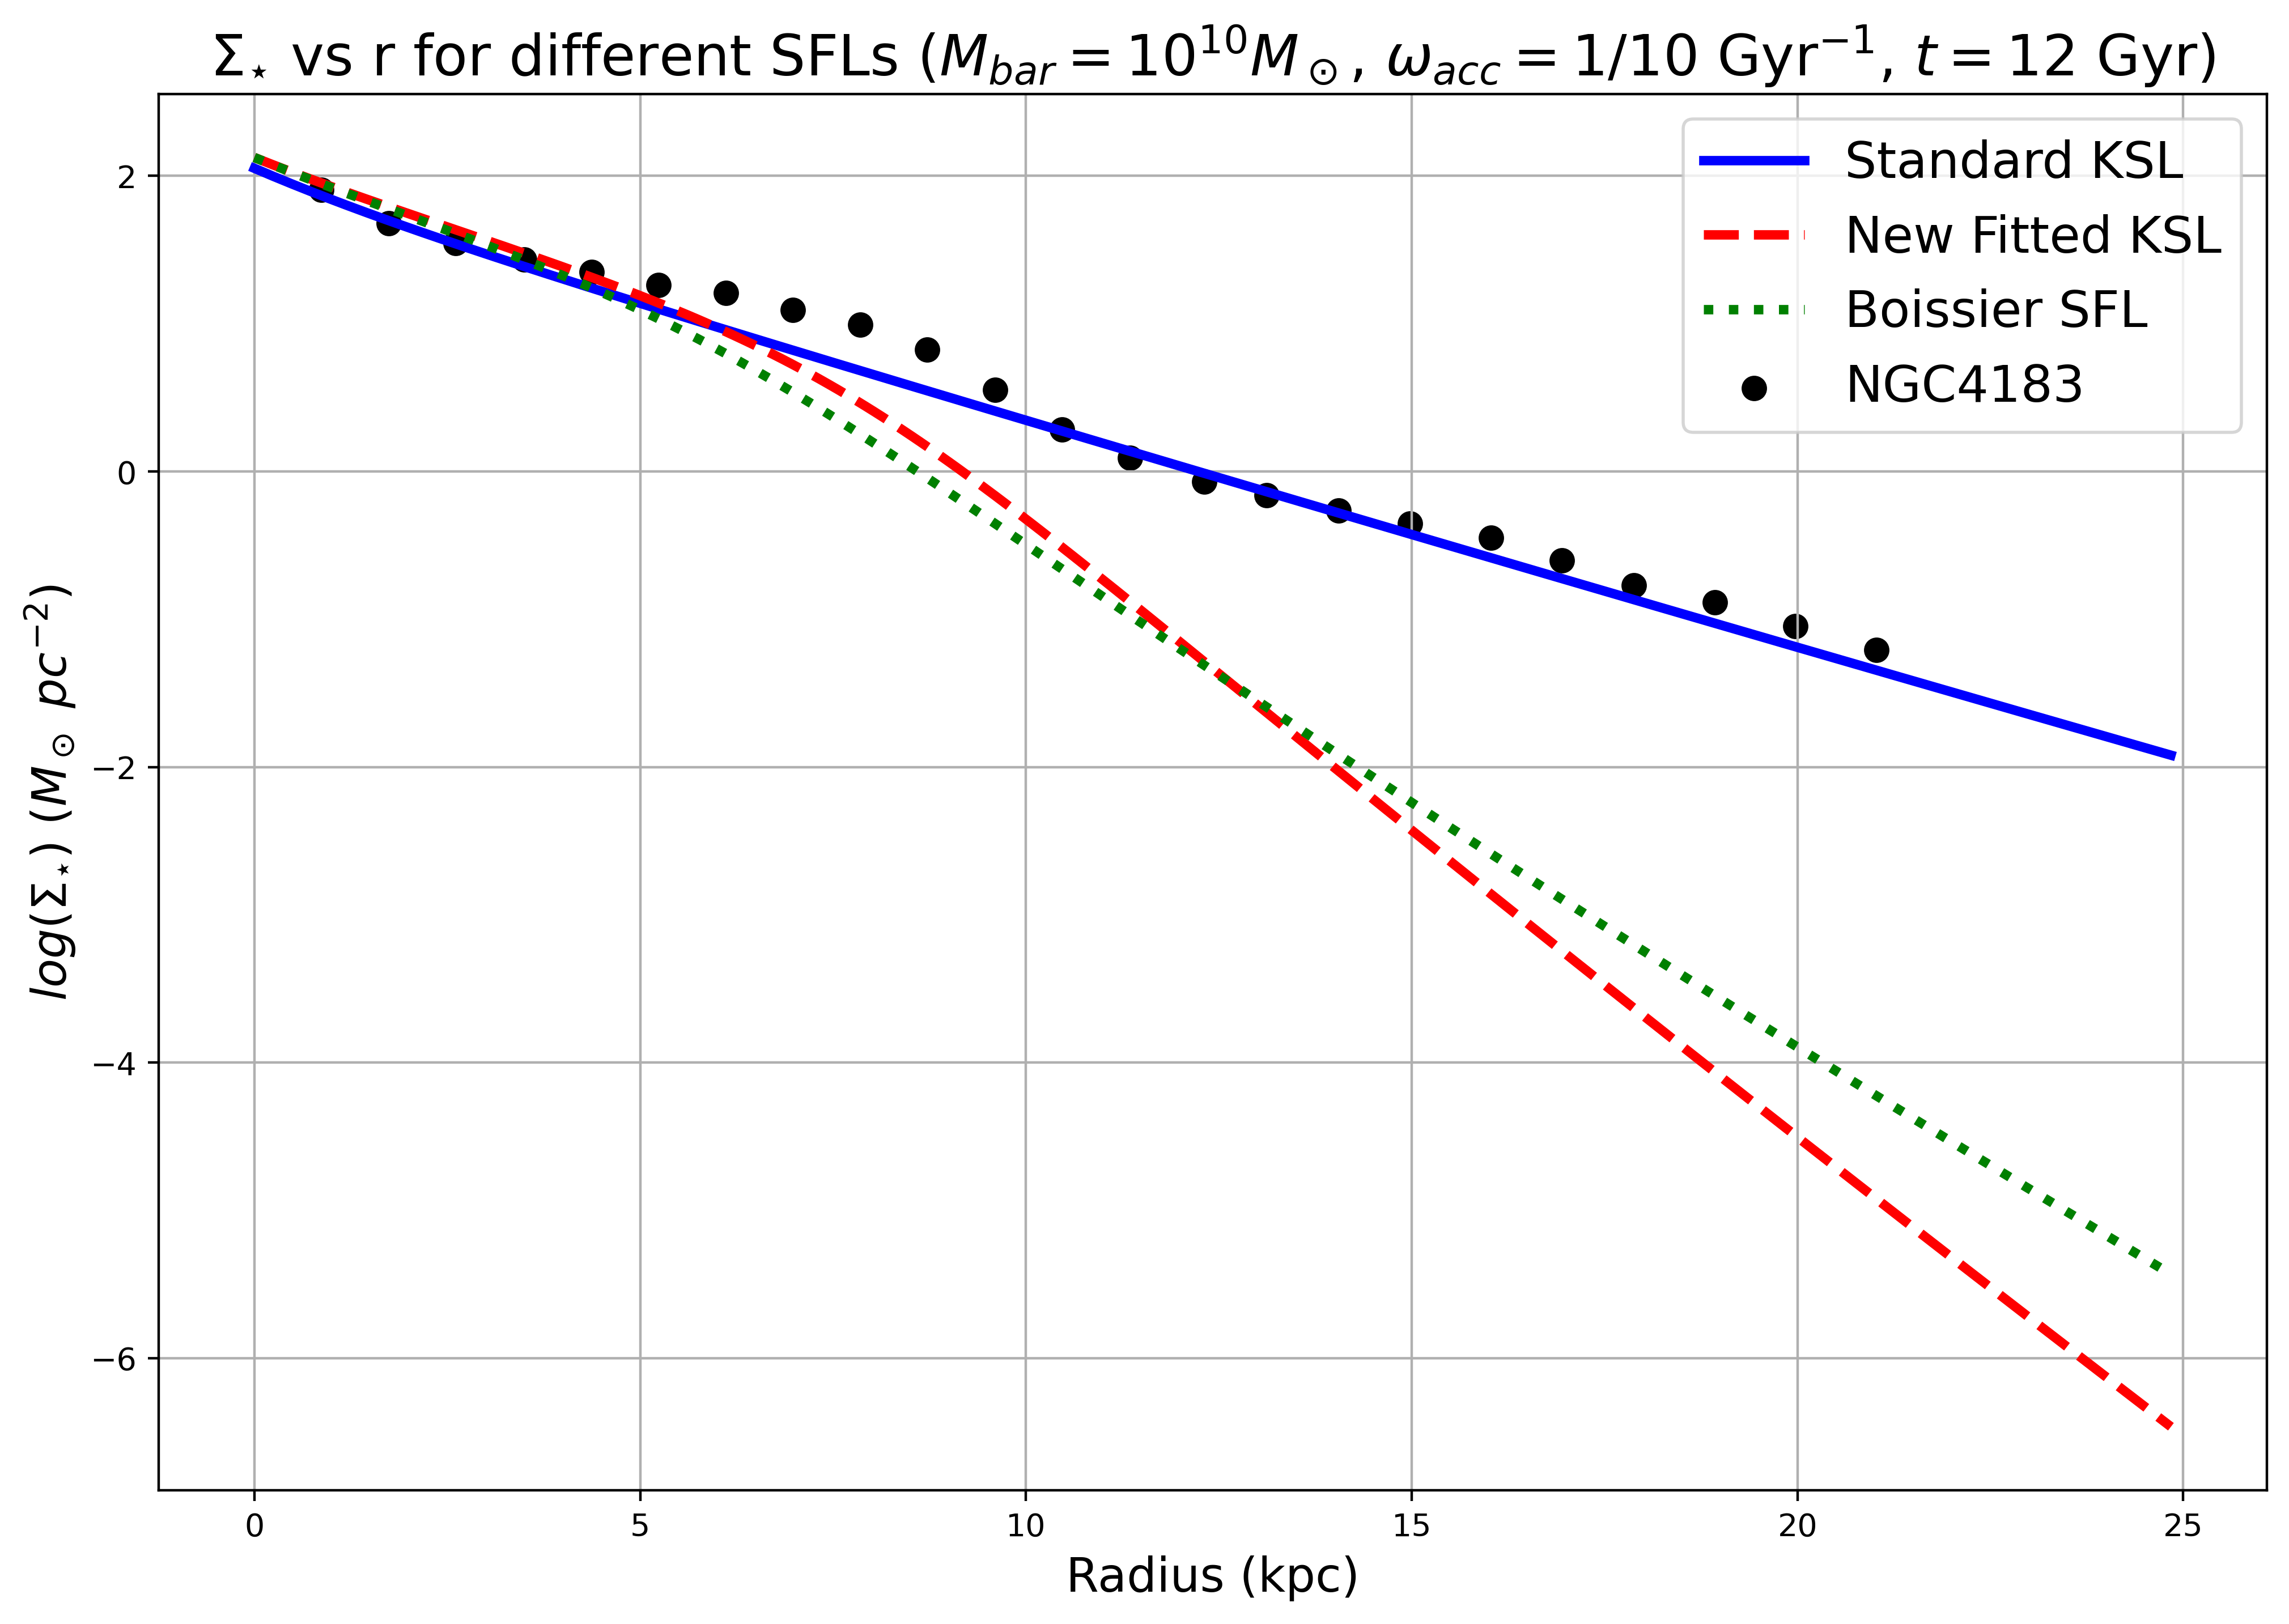

In [19]:
middle_sigmas_star = np.array([Sigma_star_old_ksl_10[2], Sigma_star_new_ksl_10[2], Sigma_star_boissier_10[2]])

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_sigmas_star, SFLS, colors, styles):
    frame.plot(r[:index_r1]/1000, np.log10(M1[:index_r1,index_t4]), label=sfl, linestyle=sty, color=col, lw=3)
frame.scatter(NGC4183_r_obs_HI, np.log10(NGC4183_Sigma_star_obs), label=r"NGC4183", c='k', s=50)
frame.set_title(r"$\Sigma_{\star}$ vs r for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = 1/10$ Gyr$^{-1}$, $t=12$ Gyr)", fontsize = 18)
frame.set_xlabel("Radius (kpc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{\star})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.grid()
show()

In [20]:
middle_sigmas_bar = middle_sigmas_gas + middle_sigmas_star

SFLS = np.array(['Standard KSL', 'New Fitted KSL', 'Boissier SFL'])
colors = ['b', 'r', 'g']
styles = ['solid', 'dashed', 'dotted']

fig = figure(figsize=(12,8), dpi=400, facecolor='w')
frame = fig.add_subplot(1,1,1)
for i, M1, sfl, col, sty in zip(range(3), middle_sigmas_bar, SFLS, colors, styles):
    frame.plot(r[:index_r1]/1000, np.log10(M1[:index_r1,index_t4]), label=sfl, linestyle=sty, color=col, lw=3)
frame.scatter(NGC0925_r_obs_HI, np.log10(NGC0925_Sigma_gas_obs+NGC0925_Sigma_star_obs), label=r"NGC0925", c='k', s=50)
frame.set_title(r"$\Sigma_{bar}$ vs r for different SFLs ($M_{bar}=10^{10}M_\odot$, $\omega_{acc} = 1/10$ Gyr$^{-1}$, $t=12$ Gyr)", fontsize = 18)
frame.set_xlabel("Radius (kpc)", fontsize = 15)
frame.set_ylabel(r"$log(\Sigma_{bar})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
frame.legend(prop={'size': 16})
frame.grid()
show()

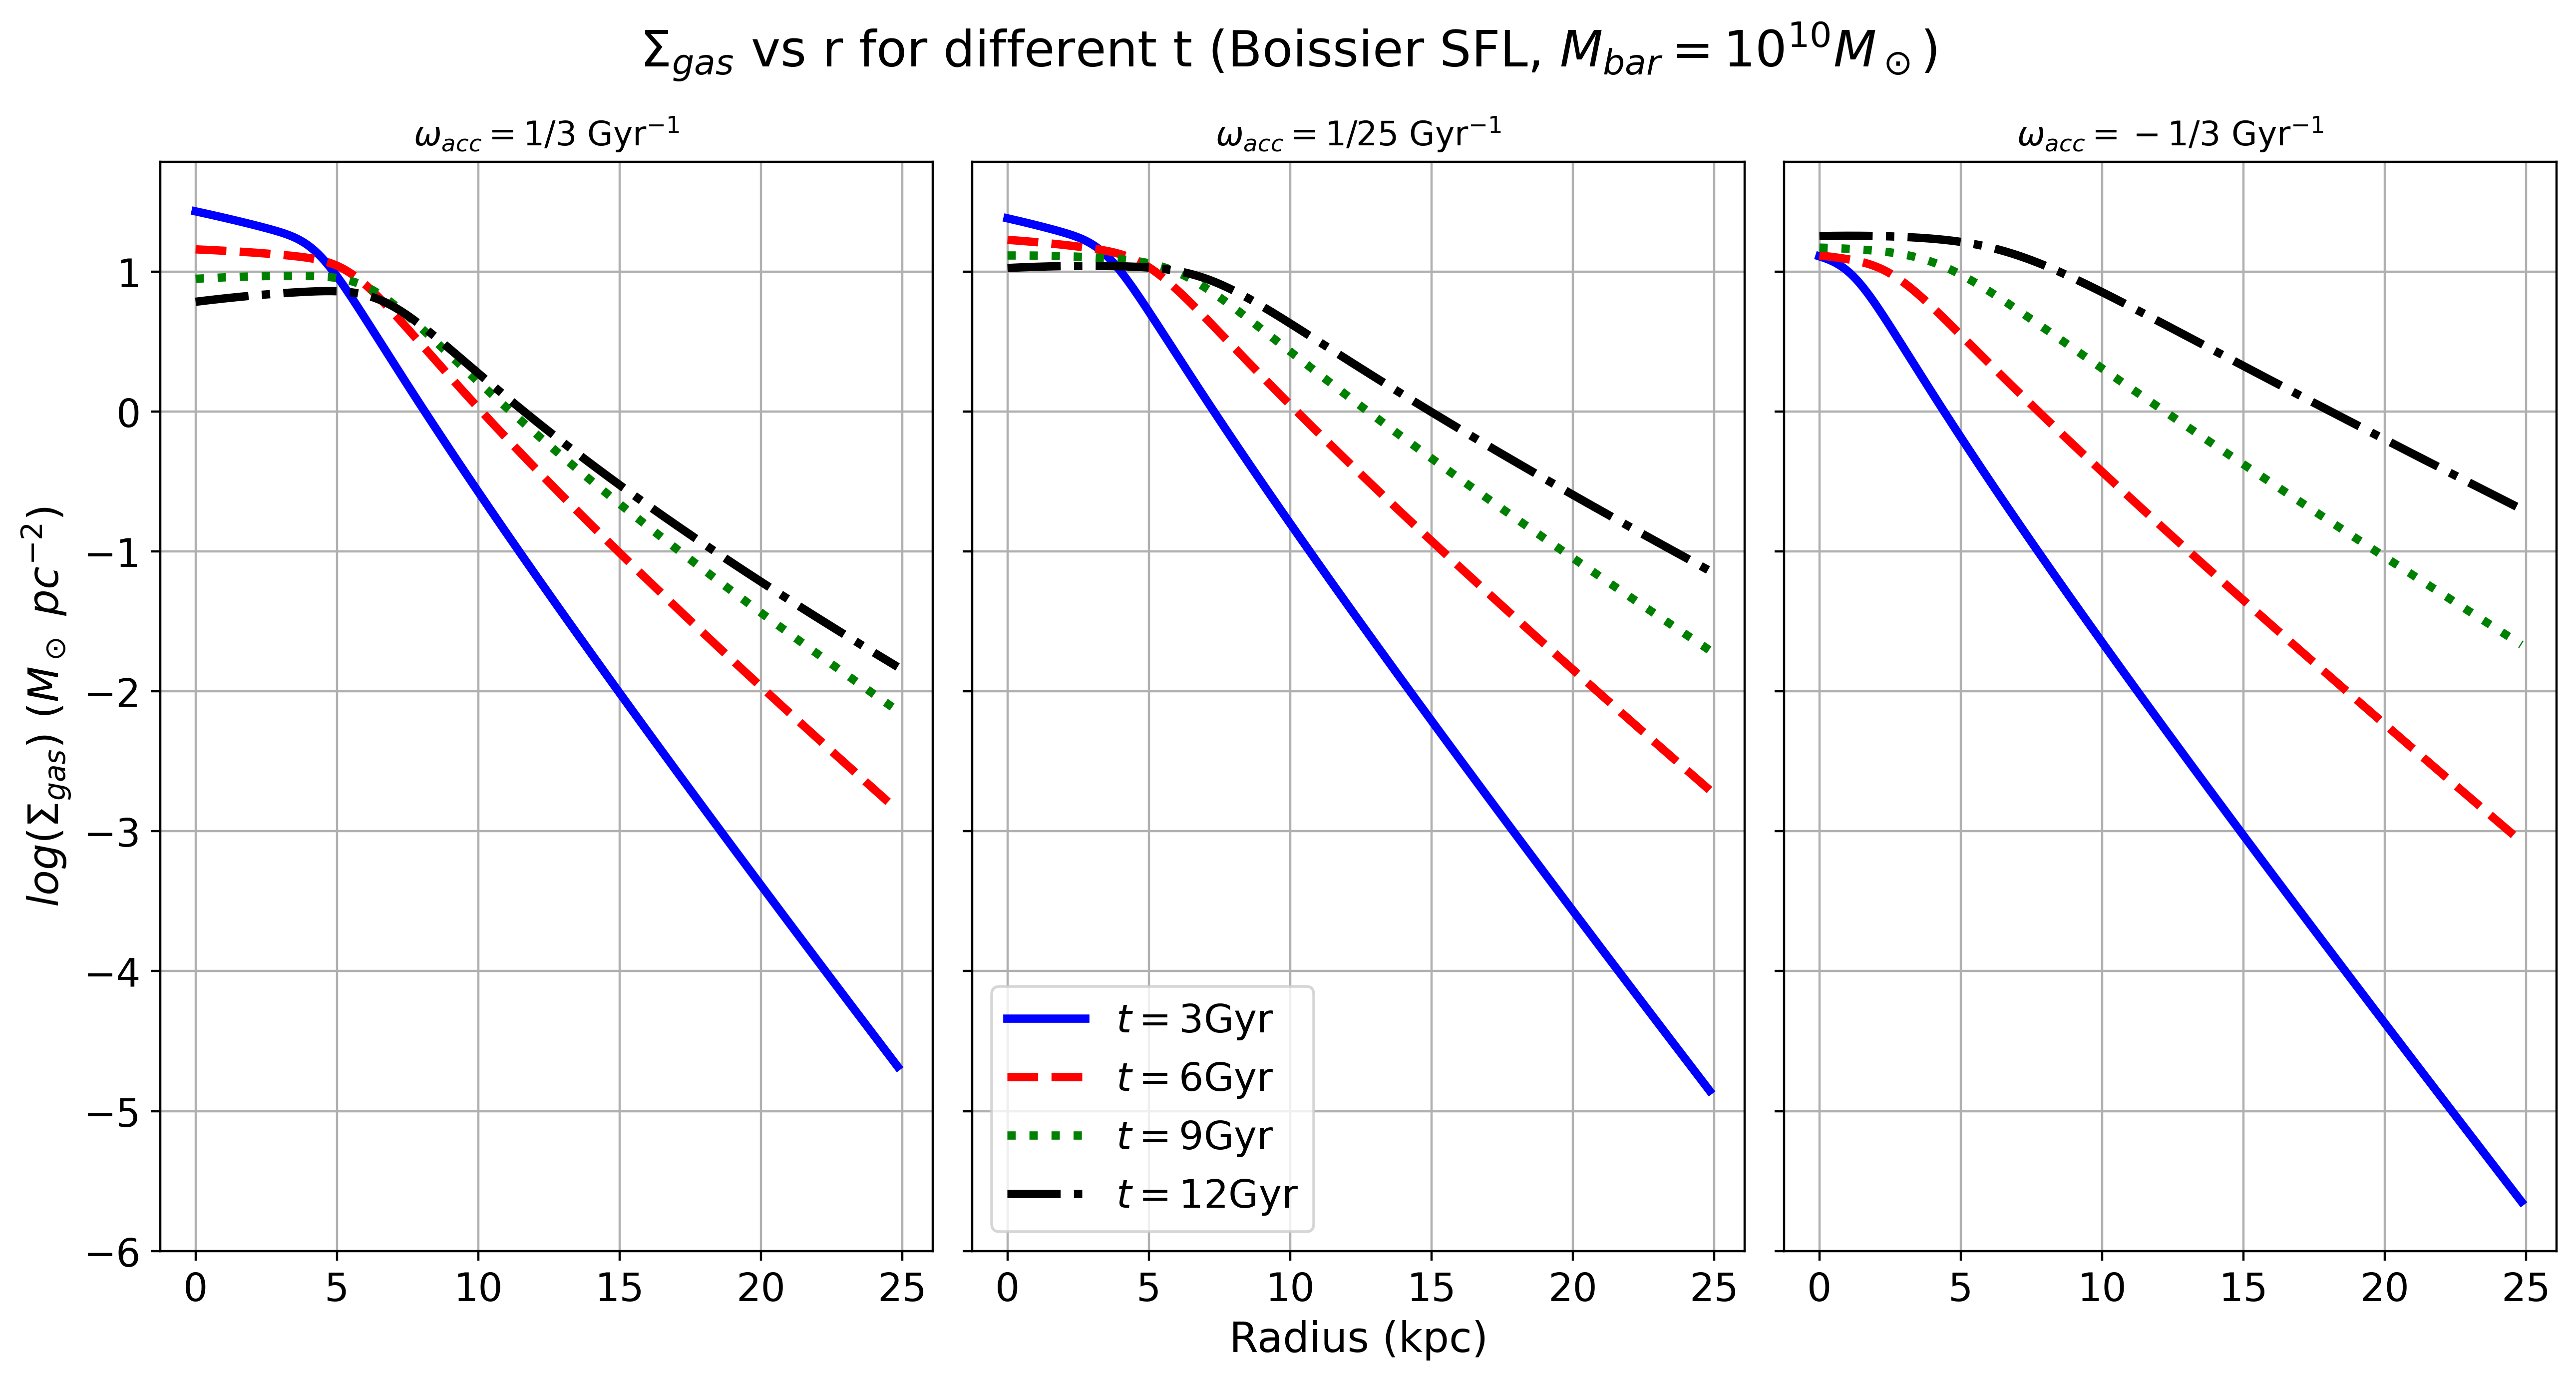

In [45]:
# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey="row", figsize=(13, 7), dpi=400, facecolor='w')

# Set the labels and titles of the subplots
f1 = axes[0]
f2 = axes[1]
f3 = axes[2]
fig.suptitle(r"$\Sigma_{gas}$ vs r for different t (Boissier SFL, $M_{bar}=10^{10}M_\odot$)", fontsize = 18)
f2.set_xlabel("Radius (kpc)", fontsize = 15)
f1.set_ylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
f1.set_title(r"$\omega_{acc} = 1/3$ Gyr$^{-1}$")
f2.set_title(r"$\omega_{acc} = 1/25$ Gyr$^{-1}$")
f3.set_title(r"$\omega_{acc} = -1/3$ Gyr$^{-1}$")

for i, M1 in zip(range(3), Sigma_gas_boissier_10):
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    
    
f2.legend(prop={"size": 14})
# Add grid lines to each subplot and adjust layout
for ax in axes:
    ax.grid(True)
    ax.tick_params(labelsize=14)

plt.tight_layout()
show()

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(15, 10))

# Set the labels and titles of the subplots
fig.suptitle(r"$\Sigma_{gas}$ vs r for different t and $t_{acc}$ ($M_{bar}=10^{11.5}M_\odot$)", fontsize = 18)
fig.supxlabel("Radius (kpc)", fontsize = 15)
fig.supylabel(r"$log(\Sigma_{gas})$ $(M_\odot\ pc^{-2})$", fontsize = 15)
    
for i, M1, M2, M3, t_accr in zip(range(3), Sigma_gas_old_ksl_115, Sigma_gas_new_ksl_115, Sigma_gas_boissier_115, t_acc_array):
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[0,i].plot(r[:index_r1]/1000, np.log10(M1[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[0,i].set_title(r"Old KSL $\omega_{acc}=$"+f"1/{t_accr:.0f}Gyr")
    
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[1,i].plot(r[:index_r1]/1000, np.log10(M2[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[1,i].set_title(r"New KSL $\omega_{acc}=$"+f"1/{t_accr:.0f}Gyr")
    
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t1])[:index_r1], label=r"$t = 3$Gyr", color="blue", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t2])[:index_r1], label=r"$t = 6$Gyr", linestyle="dashed", color="red", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t3])[:index_r1], label=r"$t = 9$Gyr", linestyle="dotted", color="green", lw=3)
    axes[2,i].plot(r[:index_r1]/1000, np.log10(M3[:,index_t4])[:index_r1], label=r"$t = 12$Gyr", linestyle="dashdot", color="black", lw=3)
    axes[2,i].set_title(r"Boissier SFL $\omega_{acc}=$"+f"1/{t_accr:.0f}Gyr")
    
    axes[0,i].legend()
    axes[1,i].legend()
    axes[2,i].legend()
    
# Add grid lines to each subplot and adjust layout
for axe in axes:
    for ax in axe:
        ax.grid(True)

plt.tight_layout()
show()